In [1]:
# Allows us to work with dataframes
import pandas as pd
# Allows us to display all columns when a dataframe is printed
from IPython.display import display
# import the seaborn library
import seaborn as sns
# import done to avoid warnings
from warnings import filterwarnings
# import the matplot library
import matplotlib.pyplot as plt
# import the numpy library
import numpy as np

In [2]:
# Read the cleaned data file and assign it to a dataframe
muddy_p_df = pd.read_excel('part_2_mp_cleaning.xlsx')

In [3]:
# Display all columns when printing a dataframe
pd.options.display.max_columns = None

In [4]:
# Check the top of the dataframe
muddy_p_df.head()

,Unnamed: 0,pet_name,pet_breed,other_name,litter_name,length_of_stay_days,current_status,pet_age,age_total_years,age_total_months,adoption_fee,size,weight,gender,siblings,type_of_intake,acquired_by,where_was_pet_originally_found,coordinators,pet_type,parent_of_litter,color,shedding,coat_length,coat_pattern,events_attendance,temperament,breed_type,courtesy_post,cross_post,bonded_pair,is_mix,shots_up_to_date,spayed_neutered,hypoallergenic,housebroken,special_need,gets_along_with_cats,gets_along_with_dogs,gets_along_with_kids,date_pet_entered_your_care,adoption_foster_date,date_placed_in_current_location,last_updated_at,date_of_birth,petstablished_id,microchip_id,microchip_manufacturer,internal_id,description,internal_notes,behavioral_tracking_notes,additional_comments
0,5,aaliyah,australian shepherd,,NaN,8.0,adopted,puppy,NaN,NaN,600.0,medium,NaN,female,NaN,relinquished by owner,NaN,NaN,NaN,dog,NaN,"gray, black, white",sheds a lot,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,2023-01-08,2023-01-16,2023-01-17,2023-01-17,2023-11-04,ps1615513,900085001279038,NaN,NaN,<p>are you looking for an active pup to take w...,NaN,NaN,NaN
1,6,abbey,schnauzer (standard),,NaN,43.0,adopted,senior,12.583333,151.0,400.0,small,NaN,female,NaN,other,NaN,NaN,jade fucinaro- vetting coordinator,dog,NaN,gray/blue/silver/salt & pepper,no shedding,NaN,NaN,NaN,NaN,NaN,0,0,0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,2021-06-02,2021-07-15,NaT,2021-09-07,2010-06-02,ps1120886,900085001212610,NaN,NaN,<p>abbey is a jack russell terrier and schnauz...,NaN,NaN,NaN
2,8,abby,schnauzer (miniature),,NaN,24.0,adopted,senior,13.250000,159.0,250.0,small,NaN,female,NaN,other,NaN,NaN,NaN,dog,NaN,gray,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,1.0,1.0,1.0,1.0,0.0,NaN,1.0,NaN,2018-10-02,2018-10-26,NaT,2021-09-07,2009-10-01,ps333886,985112010405694,NaN,NaN,"<p>abby, the 9 year old miniature schnauzer is...",NaN,NaN,NaN
3,10,abby,chihuahua,,NaN,113.0,deceased,adult,11.250000,135.0,100.0,small,NaN,female,NaN,relinquished by owner,NaN,NaN,NaN,dog,NaN,"black, tan",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,1.0,1.0,2018-10-14,NaT,2018-10-13,2021-09-07,2011-10-18,ps337595,981020009722452,NaN,NaN,<p>abby is a charming chihuahua who loves to s...,originally surrendered by homeless person. ad...,NaN,NaN
4,11,abby,labrador retriever,,NaN,569.0,returned to owner,senior,14.333333,172.0,265.0,large,NaN,female,NaN,other,NaN,NaN,NaN,dog,NaN,yellow,sheds a lot,NaN,NaN,NaN,NaN,NaN,1,0,0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,1.0,1.0,2021-07-05,NaT,NaT,2021-09-07,2008-09-05,ps1149963,NaN,NaN,NaN,"<p>this senior sweetie is abby, a yellow lab b...",NaN,NaN,NaN


<AxesSubplot:>

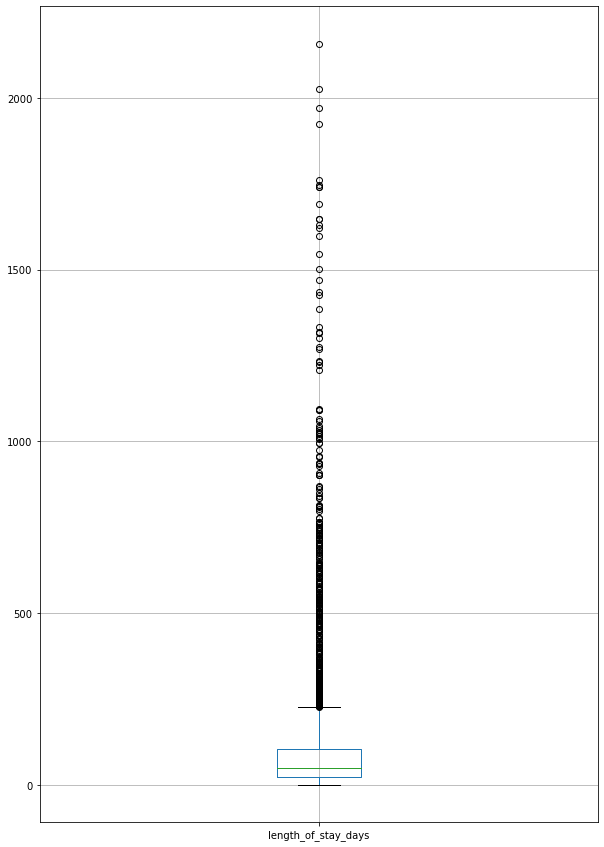

In [5]:
# Create a boxplot to show the distribution of lengths of stay for animals at Muddy Paws
muddy_p_df.boxplot(column = 'length_of_stay_days', figsize = (10, 15))

We can see above that there are a lot of outliers in the length of stay column. We will be interested in those later (for instance, what are the traits that lead to such long lengths of stay?). For now, let's present the same boxplot with the outliers removed.

<AxesSubplot:>

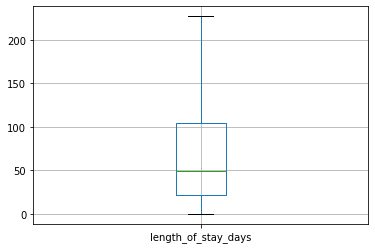

In [6]:
# Show boxplot of length of stay with the outliers removed
muddy_p_df.boxplot(column = 'length_of_stay_days', showfliers = False)

In [7]:
# Check the average stay of a Muddy Paws animal
muddy_p_df['length_of_stay_days'].mean()

129.81964573268922

In [8]:
# Check the median stay of a Muddy Paws animal
muddy_p_df['length_of_stay_days'].median()

49.0

In [9]:
# Check the metrics of the length of stay
print('The mean stay is: ', round(muddy_p_df['length_of_stay_days'].mean()), 'days')
print('The median stay is: ', round(muddy_p_df['length_of_stay_days'].median()), 'days')
print('The max stay is: ', muddy_p_df['length_of_stay_days'].max(), 'days')
print('The minimum stay is: ', muddy_p_df['length_of_stay_days'].min(), 'days')

The mean stay is:  130 days
The median stay is:  49 days
The max stay is:  2158.0 days
The minimum stay is:  0.0 days


Let's examine how many animals of each breed have passed through Muddy Paws since it was founded.

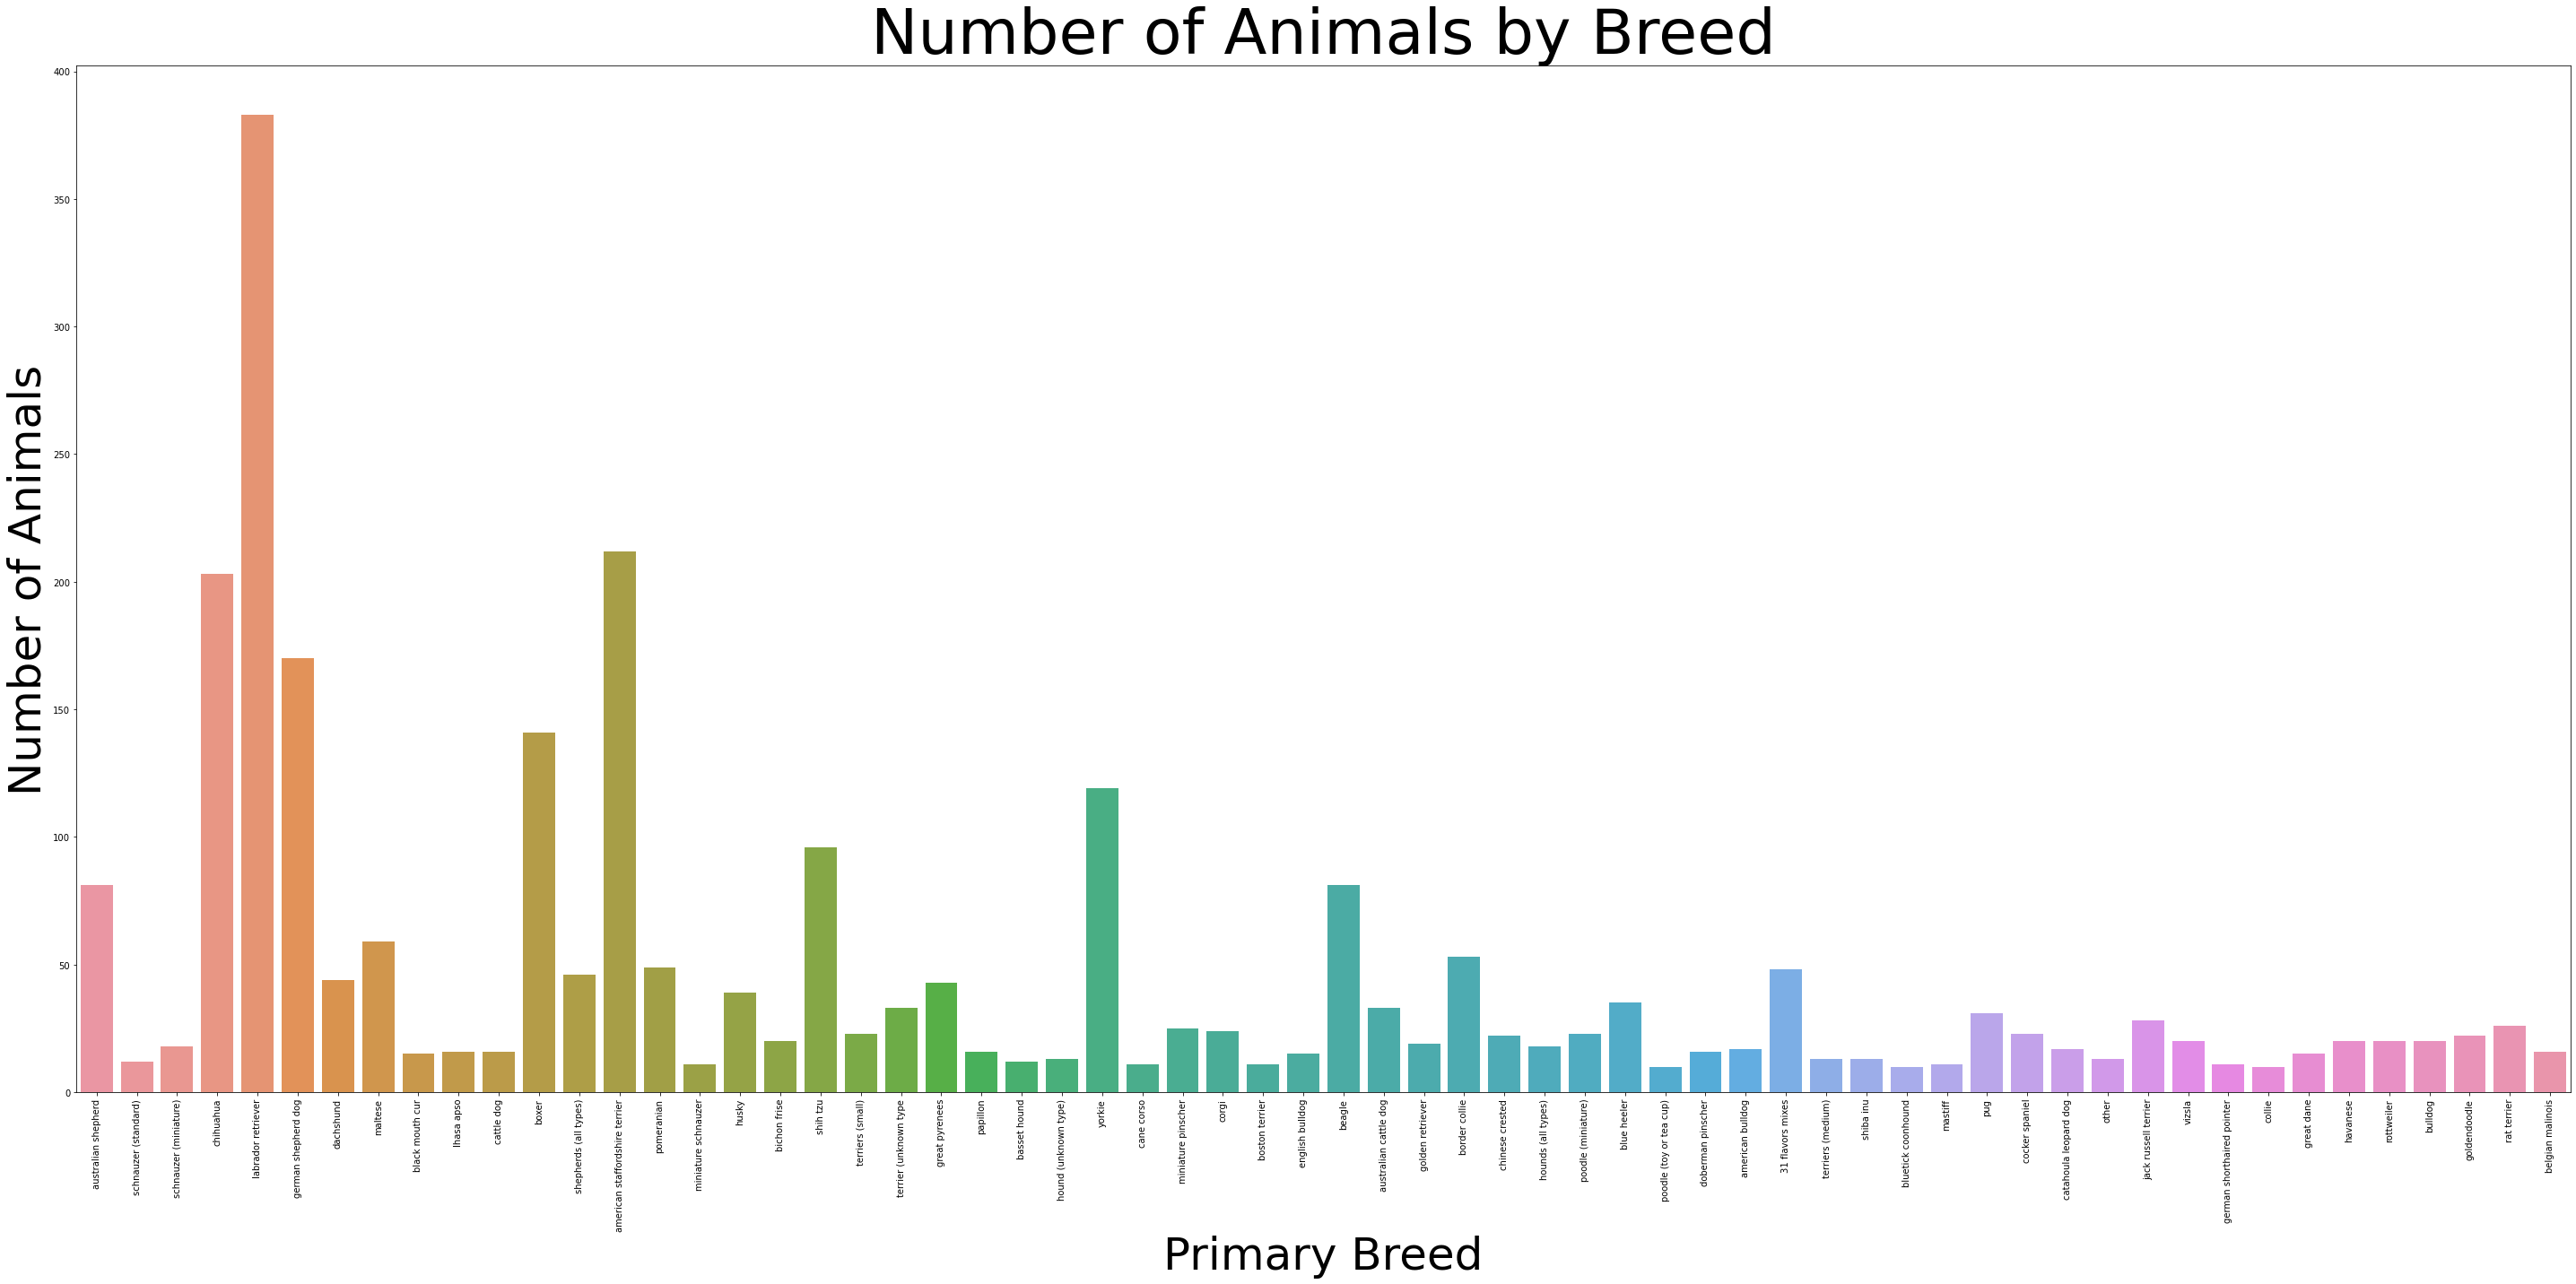

In [10]:
# Set the plot size
plt.figure(figsize = (40, 20))

# Create a countplot with number of animals for each breed
ax = sns.countplot(x = 'pet_breed', data = muddy_p_df, dodge = False)
# Set the x tick labels to rotate by 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
# Set the title and title font size
ax.set_title('Number of Animals by Breed', fontsize = 70)
# Set the x label name and font size
plt.xlabel('Primary Breed', fontsize = 50)
# Set the y label name and font size
plt.ylabel('Number of Animals', fontsize = 50)
# Set the display to tight layout
plt.tight_layout()
# Show the plot
plt.show()

We can see that by far the most frequently seen breed is the Labrador Retriever. I suspect this is because they are very popular breed and so many puppies come into the world.

Let's check the length of stay based on breed. Using boxplots, we can see who has the greatest median length of stay.

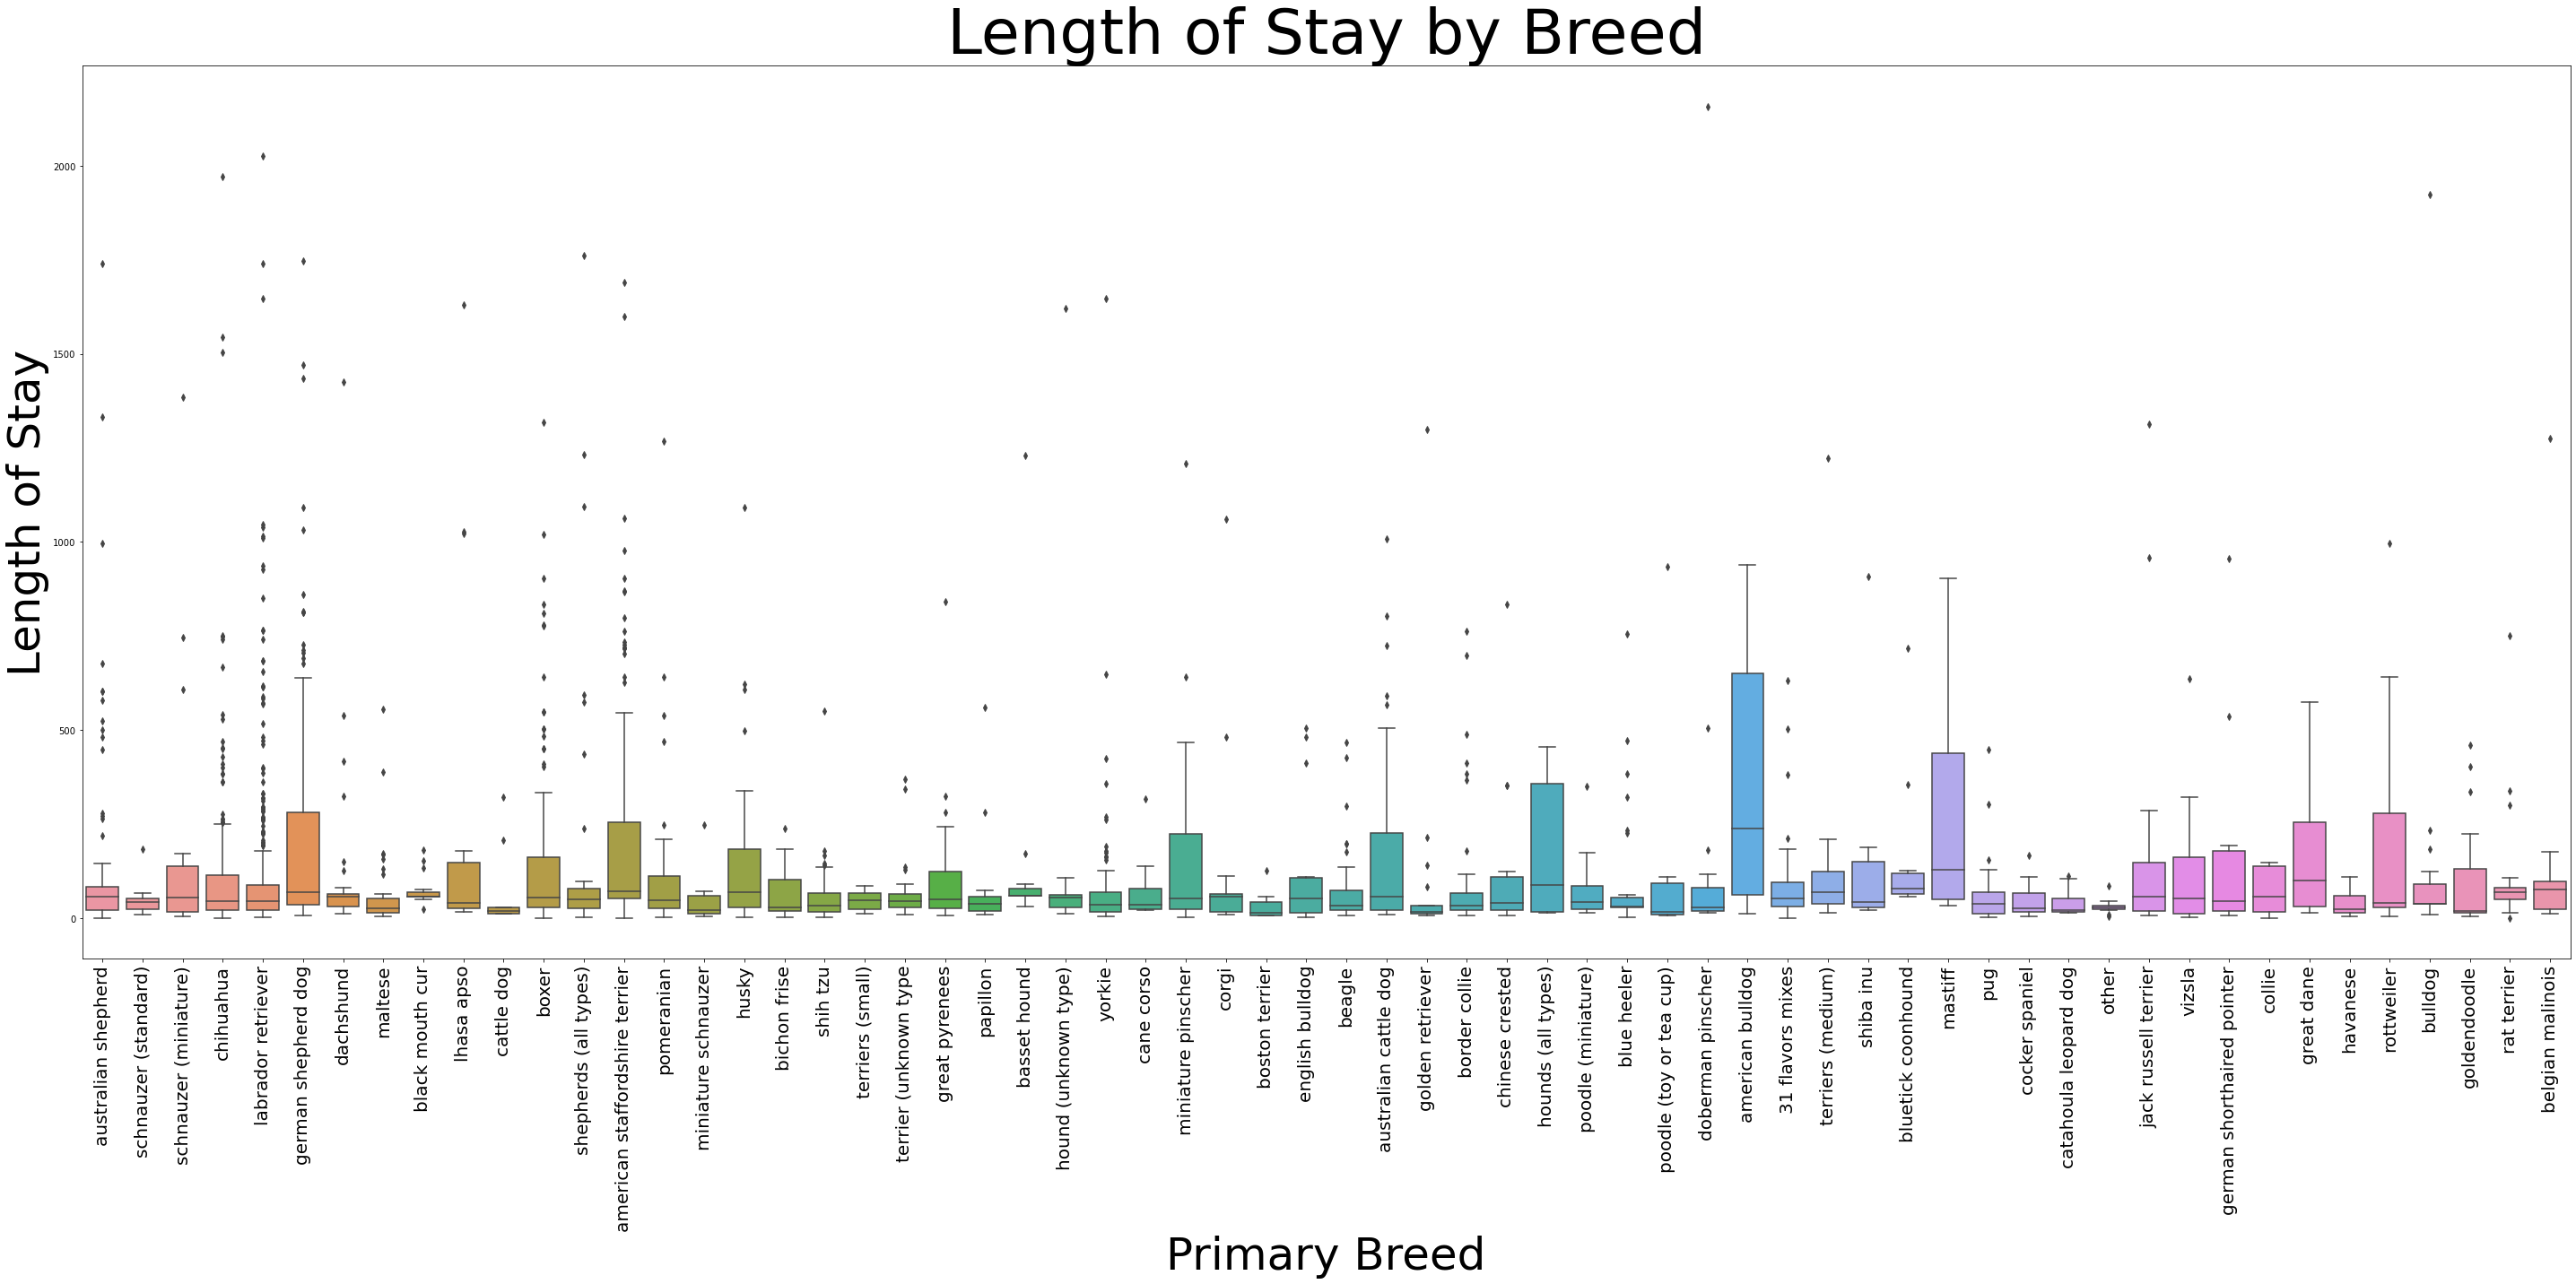

In [11]:
# Set the plot size
plt.figure(figsize = (40, 20))
# Instantiate the plot in 'ax'
ax = sns.boxplot(data = muddy_p_df, x = 'pet_breed', y = 'length_of_stay_days')
# Adjust the x tick labels to be rotated 90 degrees at fontsize 20
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 20)
# Add a title and set the fontsize at 70
ax.set_title('Length of Stay by Breed', fontsize = 70)
# Add a name to the x axis and set fontsize at 50
plt.xlabel('Primary Breed', fontsize = 50)
# Add a name to the y axis and set fontsize at 50
plt.ylabel('Length of Stay', fontsize = 50)
# Show the plot
plt.tight_layout()
plt.show()

This chart is very busy, let's see if we can narrow down to the ten breeds with the longest average lengths of stay.

In [12]:
# Create a dataframe called top_breed_stay that shows the mean length of stay for each breed
top_breed_stay = muddy_p_df.groupby('pet_breed')['length_of_stay_days'].mean()

In [13]:
# Show the breeds with the longest average lengths of stay
# It's important to note that there are outliers that heavily influence the average
top_breed_stay.nlargest(10)

pet_breed
american bulldog                  330.687500
lhasa apso                        277.375000
mastiff                           270.100000
german shepherd dog               212.883436
schnauzer (miniature)             212.875000
doberman pinscher                 205.875000
american staffordshire terrier    202.375691
german shorthaired pointer        196.600000
rottweiler                        193.210526
australian cattle dog             191.343750
Name: length_of_stay_days, dtype: float64

In [14]:
# Create a dataframe called top_breed_stay that shows the median length of stay for each breed
top_breed_stay = muddy_p_df.groupby('pet_breed')['length_of_stay_days'].median()

In [15]:
# Show the breeds with the longest median lengths of stay
top_breed_stay.nlargest(10)

pet_breed
american bulldog                  238.0
mastiff                           128.5
great dane                        100.0
hounds (all types)                 88.5
bluetick coonhound                 78.5
belgian malinois                   75.0
american staffordshire terrier     72.0
rat terrier                        69.5
german shepherd dog                69.0
terriers (medium)                  68.5
Name: length_of_stay_days, dtype: float64

In [16]:
# Check the number of dogs in each breed category
muddy_p_df.pet_breed.value_counts()

labrador retriever                383
american staffordshire terrier    212
chihuahua                         203
german shepherd dog               170
boxer                             141
                                 ... 
boston terrier                     11
german shorthaired pointer         11
poodle (toy or tea cup)            10
bluetick coonhound                 10
collie                             10
Name: pet_breed, Length: 62, dtype: int64

In [17]:
# Create a dataframe with the breeds with the top ten most dogs
breedstay_10_df = muddy_p_df[muddy_p_df['pet_breed'].str.contains('labrador retriever|american staffordshire terrier|chihuahua|german shepherd dog|boxer|yorkie|shih tzu|australian shepherd|beagle|maltese') == True]

In [18]:
# Define a function to add median labels to a boxplot
def add_median_labels(ax, fmt = '.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha = 'left', va = 'center_baseline',
                       fontweight = 'bold', color = 'white', fontsize = 40)

The below cell contains code that allows one to print the number of dogs in each breed on the boxplot below. I removed it because I needed to focus on the median length of stay rather than the number of observations. It could be useful to apply it to a different plot though.

In [19]:
# medians = breedstay_10_df.groupby(['pet_breed'])['length_of_stay_days'].median().values
# nobs = breedstay_10_df['pet_breed'].value_counts().values
# nobs = [str(x) for x in nobs.tolist()]
# nobs = ['# of dogs: ' + i for i in nobs] 
# pos = range(len(nobs))
# for tick, label in zip(pos, ax.get_yticklabels()):
#     ax.text(medians[tick], tick, nobs[tick], color = 'white', verticalalignment = 'center_baseline', fontsize = 40, 
#            fontweight = 'bold')

C:\Users\runek\AppData\Local\Temp/ipykernel_37960/3388238775.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold', color = 'white')
C:\Users\runek\AppData\Local\Temp/ipykernel_37960/3388238775.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


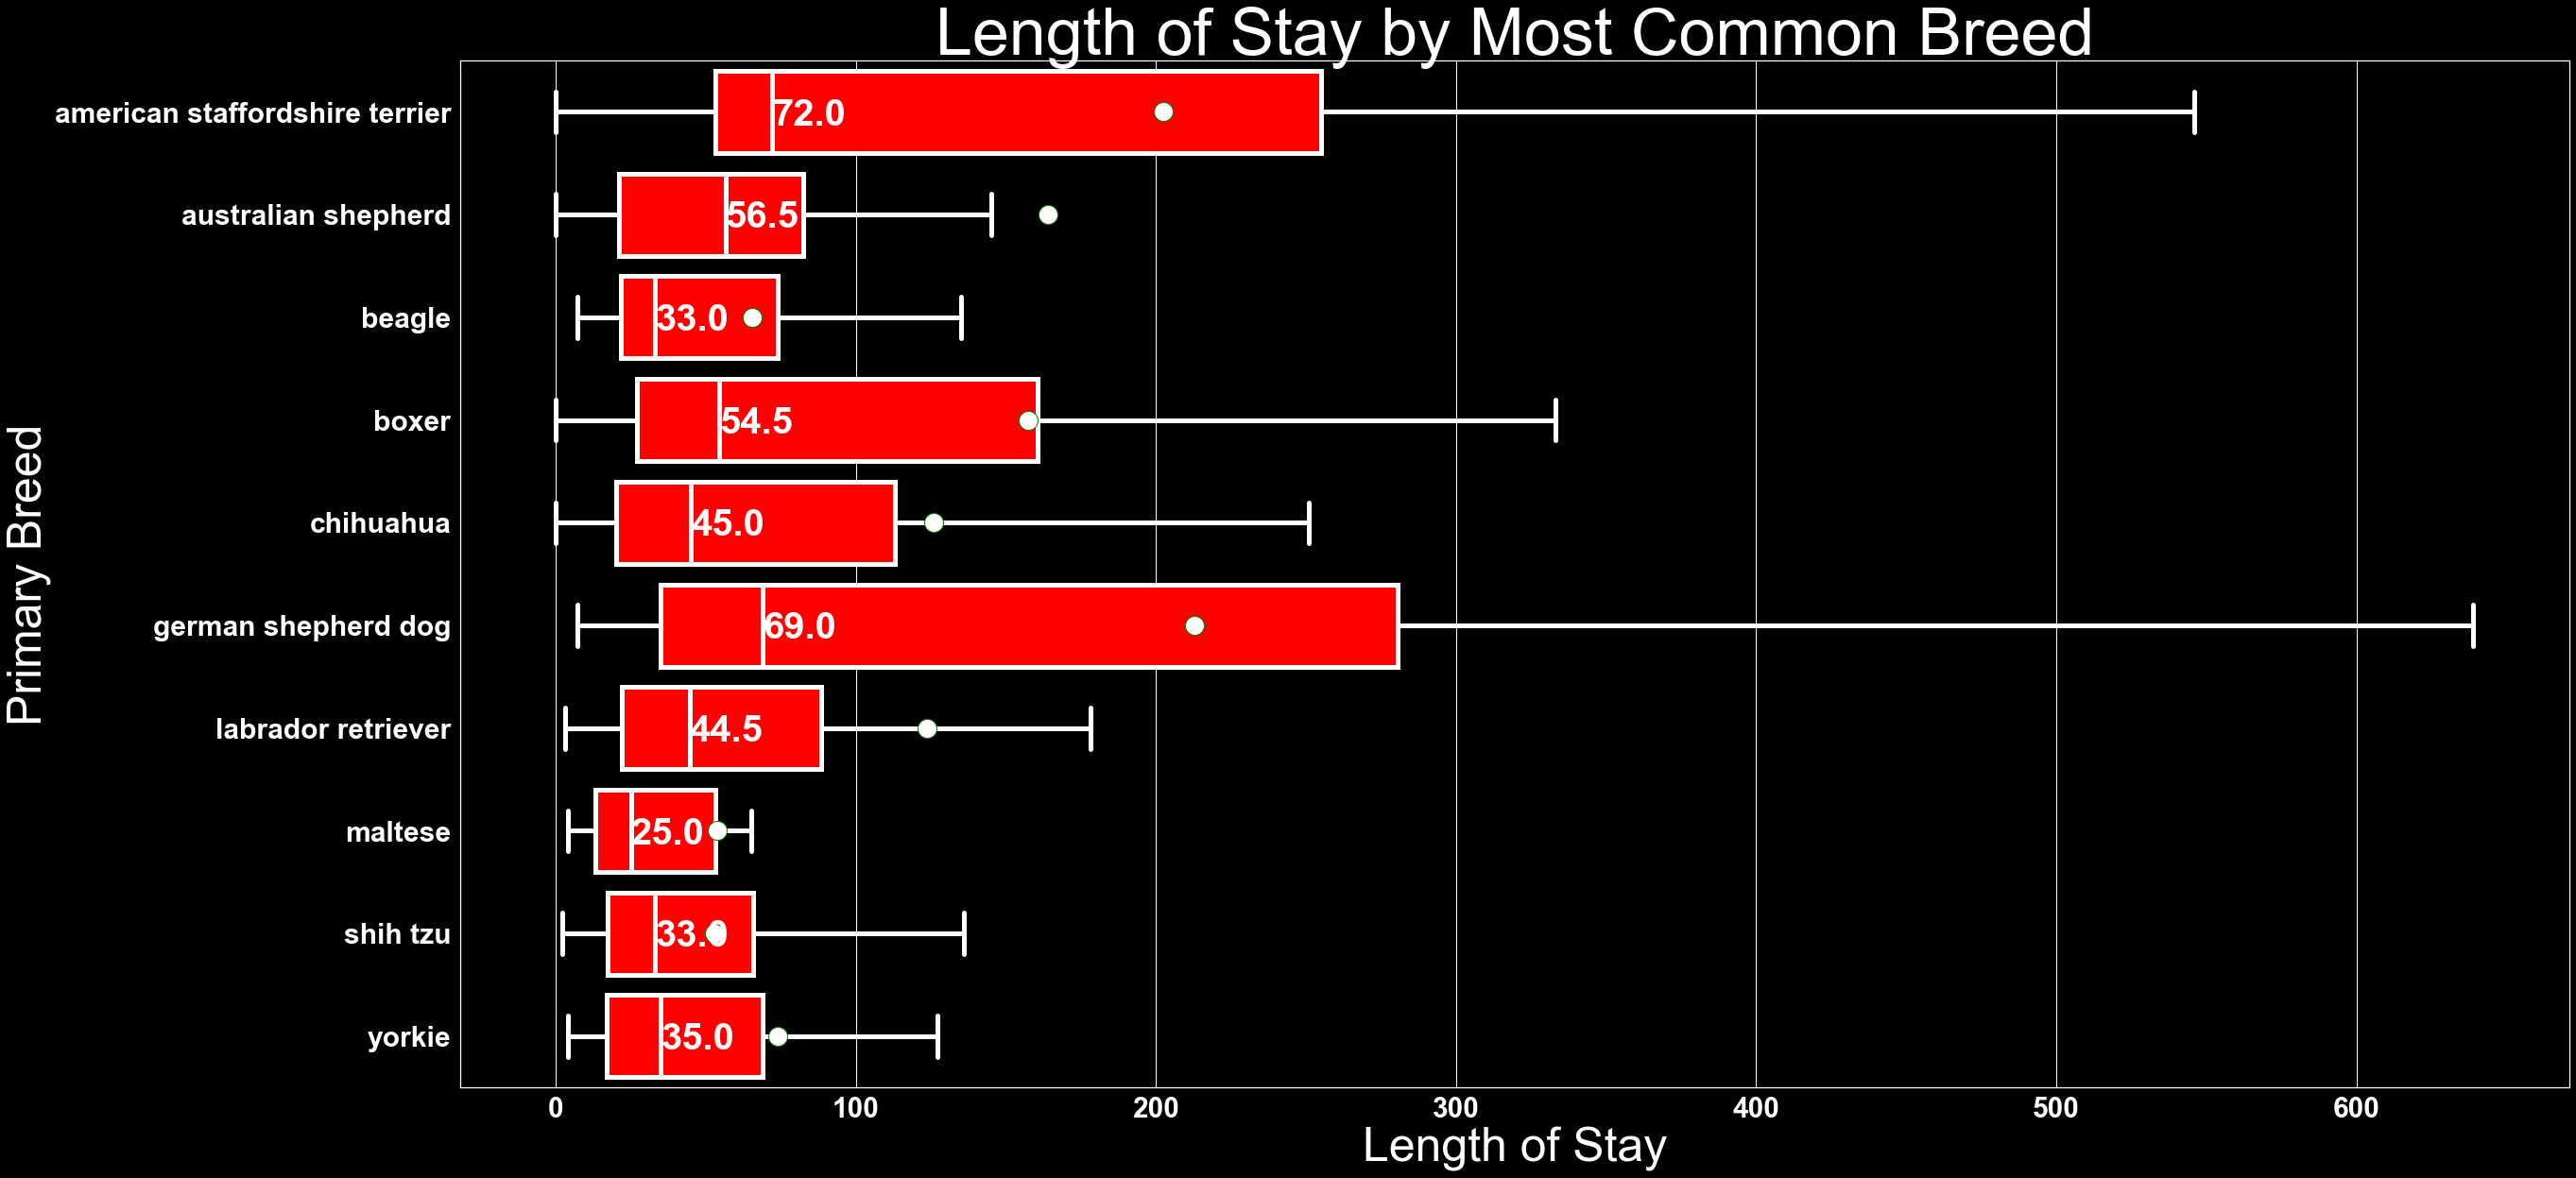

In [23]:
# Set the background (containing the x and y labels) of the plot to be black
plt.figure(facecolor = 'black')
# Create a variable called order based on the alphabatized breeds in the breedstay_10_df dataframe. It will be used below.
order = sorted(breedstay_10_df.pet_breed.unique())

# Create a dictionary of elements to put in the boxplot - I want to change the line colors of the boxplots to be white and bold
# I also want to change the fill in the boxplots to be red
PROPS = {
    'boxprops':{'facecolor':'red', 'edgecolor':'white'},
    'medianprops':{'color':'white'},
    'whiskerprops':{'color':'white'},
    'capprops':{'color':'white'}
}

# Create a boxplot and assign it to 'ax'
# It is oriented horizontally, and we have used the order variable above to assign to the order category in the sns boxplot
# I am also showing the mean of the data sets as a white circle. This shows how far the medians are from the means
# The PROPS dictionary is applied to make the required changes to line color and box fill
ax = sns.boxplot(data = breedstay_10_df, x = 'length_of_stay_days', y = 'pet_breed', order = order, 
                 orient = 'h', linewidth = 5, showfliers = False, showmeans = True, meanprops = {'marker':'o', 
                                                                                  'markerfacecolor':'white', 
                                                                                  'markeredgecolor':'green', 
                                                                                 'markersize':'20'}, **PROPS)

# Set the y tick labels to be bold, white, and size 30
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 30, fontweight = 'bold', color = 'white')
# Include plt.draw() to deal with an error with setting the x tick labels
plt.draw()
# Set the x tick labels to be bold, white, and size 30
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold', color = 'white')
# Set the background of the plot to black
ax.set_facecolor('black')


# Add a title of size 70 and color white
ax.set_title('Length of Stay by Most Common Breed', fontsize = 70, color = 'white')
# Add x axis label of fontsize 50 and color white
plt.xlabel('Length of Stay', fontsize = 50, color = 'white')
# Add y axis label of fontsize 50 and color white
plt.ylabel('Primary Breed', fontsize = 50, color = 'white')
# Tell the program to use tight layout
plt.tight_layout()

# Set the size of the plot
plt.gcf().set_size_inches(40, 20)
# Use the function defined above to add median labels to the plot
# This allows the value of the median to be printed on the boxplot next to the median line
add_median_labels(ax)
# Show the plot
plt.show()

C:\Users\runek\AppData\Local\Temp/ipykernel_37960/895428452.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold')


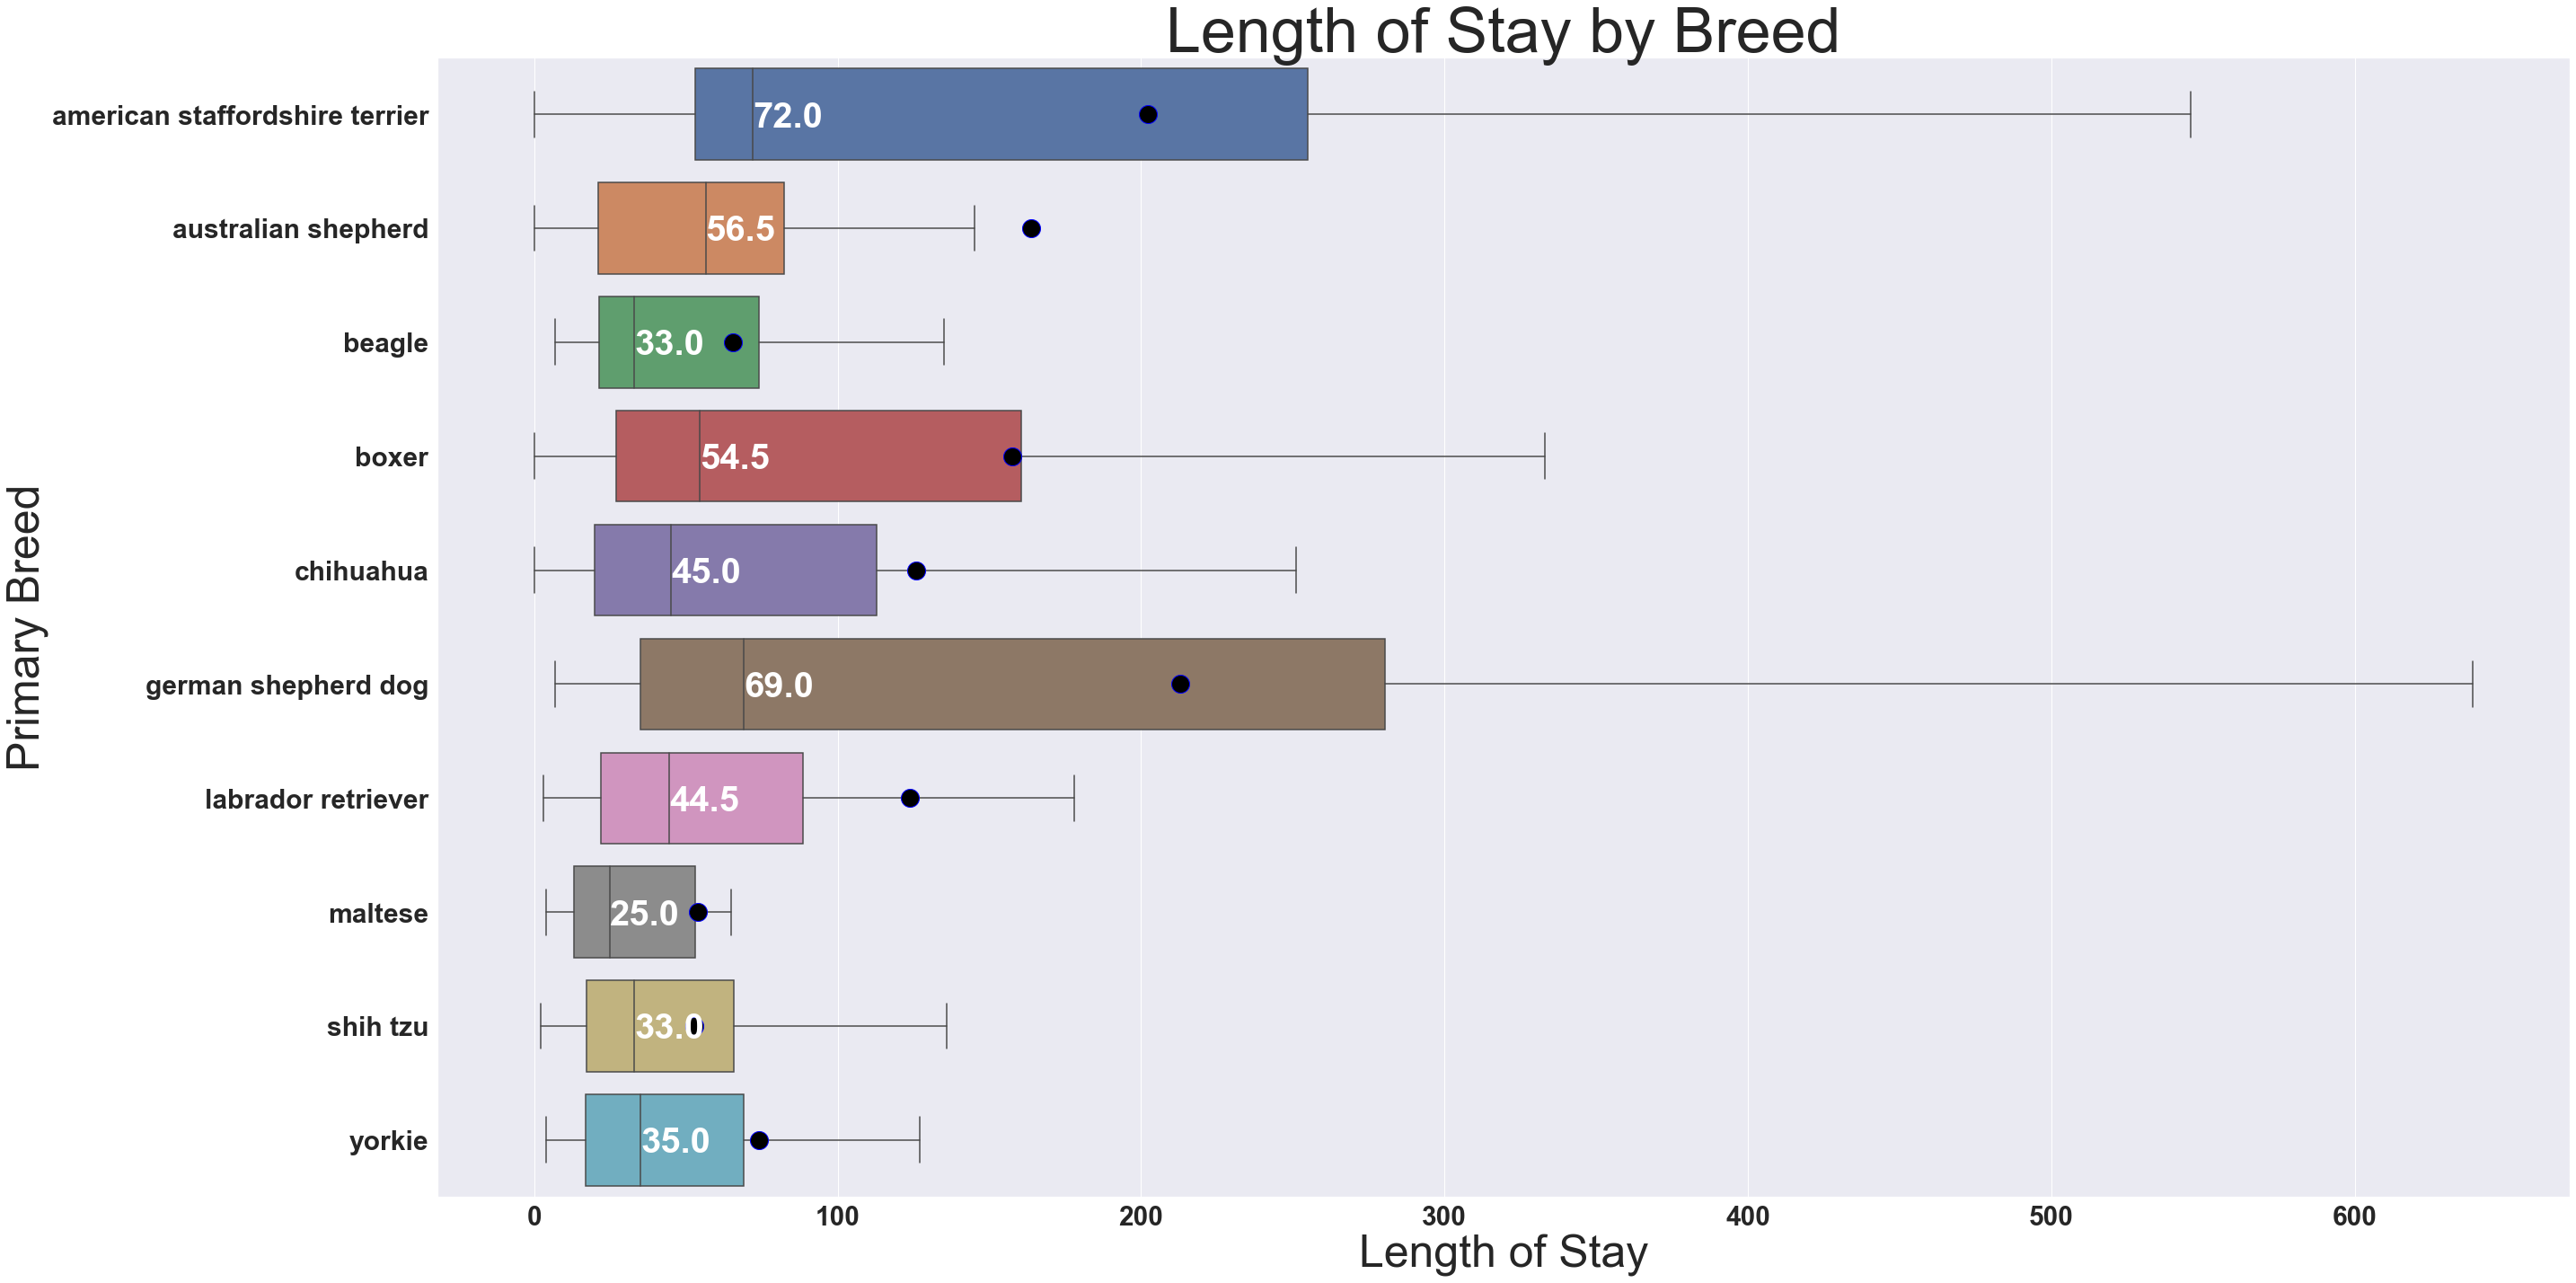

In [24]:
# Use the darkgrid style
sns.set(style = 'darkgrid')
# Assign the size of the figure
plt.figure(figsize = (40, 20))
# Define a variable, order, that contains the alphabetically sorted breeds in the breedstay_10_df
order = sorted(breedstay_10_df.pet_breed.unique())
# Assign the boxplot to ax
# It will use the order variable defined above, orient horizontally, show the means and edit their properties, 
# and ignore the outliers
ax = sns.boxplot(data = breedstay_10_df, x = 'length_of_stay_days', y = 'pet_breed', order = order, 
                 orient = 'h', showfliers = False, showmeans = True, meanprops = {'marker':'o', 
                                                                                  'markerfacecolor':'black', 
                                                                                  'markeredgecolor':'blue', 
                                                                                 'markersize':'20'})

# Set the y tick labels to fontsize 30 and fontweight bold
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 30, fontweight = 'bold')
# Include plt.draw() to deal with an error in setting the x tick labels
plt.draw()
# Set the x tick labels to fontsize 30 and fontweight bold
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold')

# Add a title of fontsize 70
ax.set_title('Length of Stay by Breed', fontsize = 70)
# Add an x axis label of fontsize 50
plt.xlabel('Length of Stay', fontsize = 50)
# Add a y axis label of fontsize 50
plt.ylabel('Primary Breed', fontsize = 50)
# Apply the tight layout to the plot
plt.tight_layout()

# Use the function defined above to add median labels
add_median_labels(ax)
# Show the plot
plt.show()

Next, let's see what the length of stay is by age.

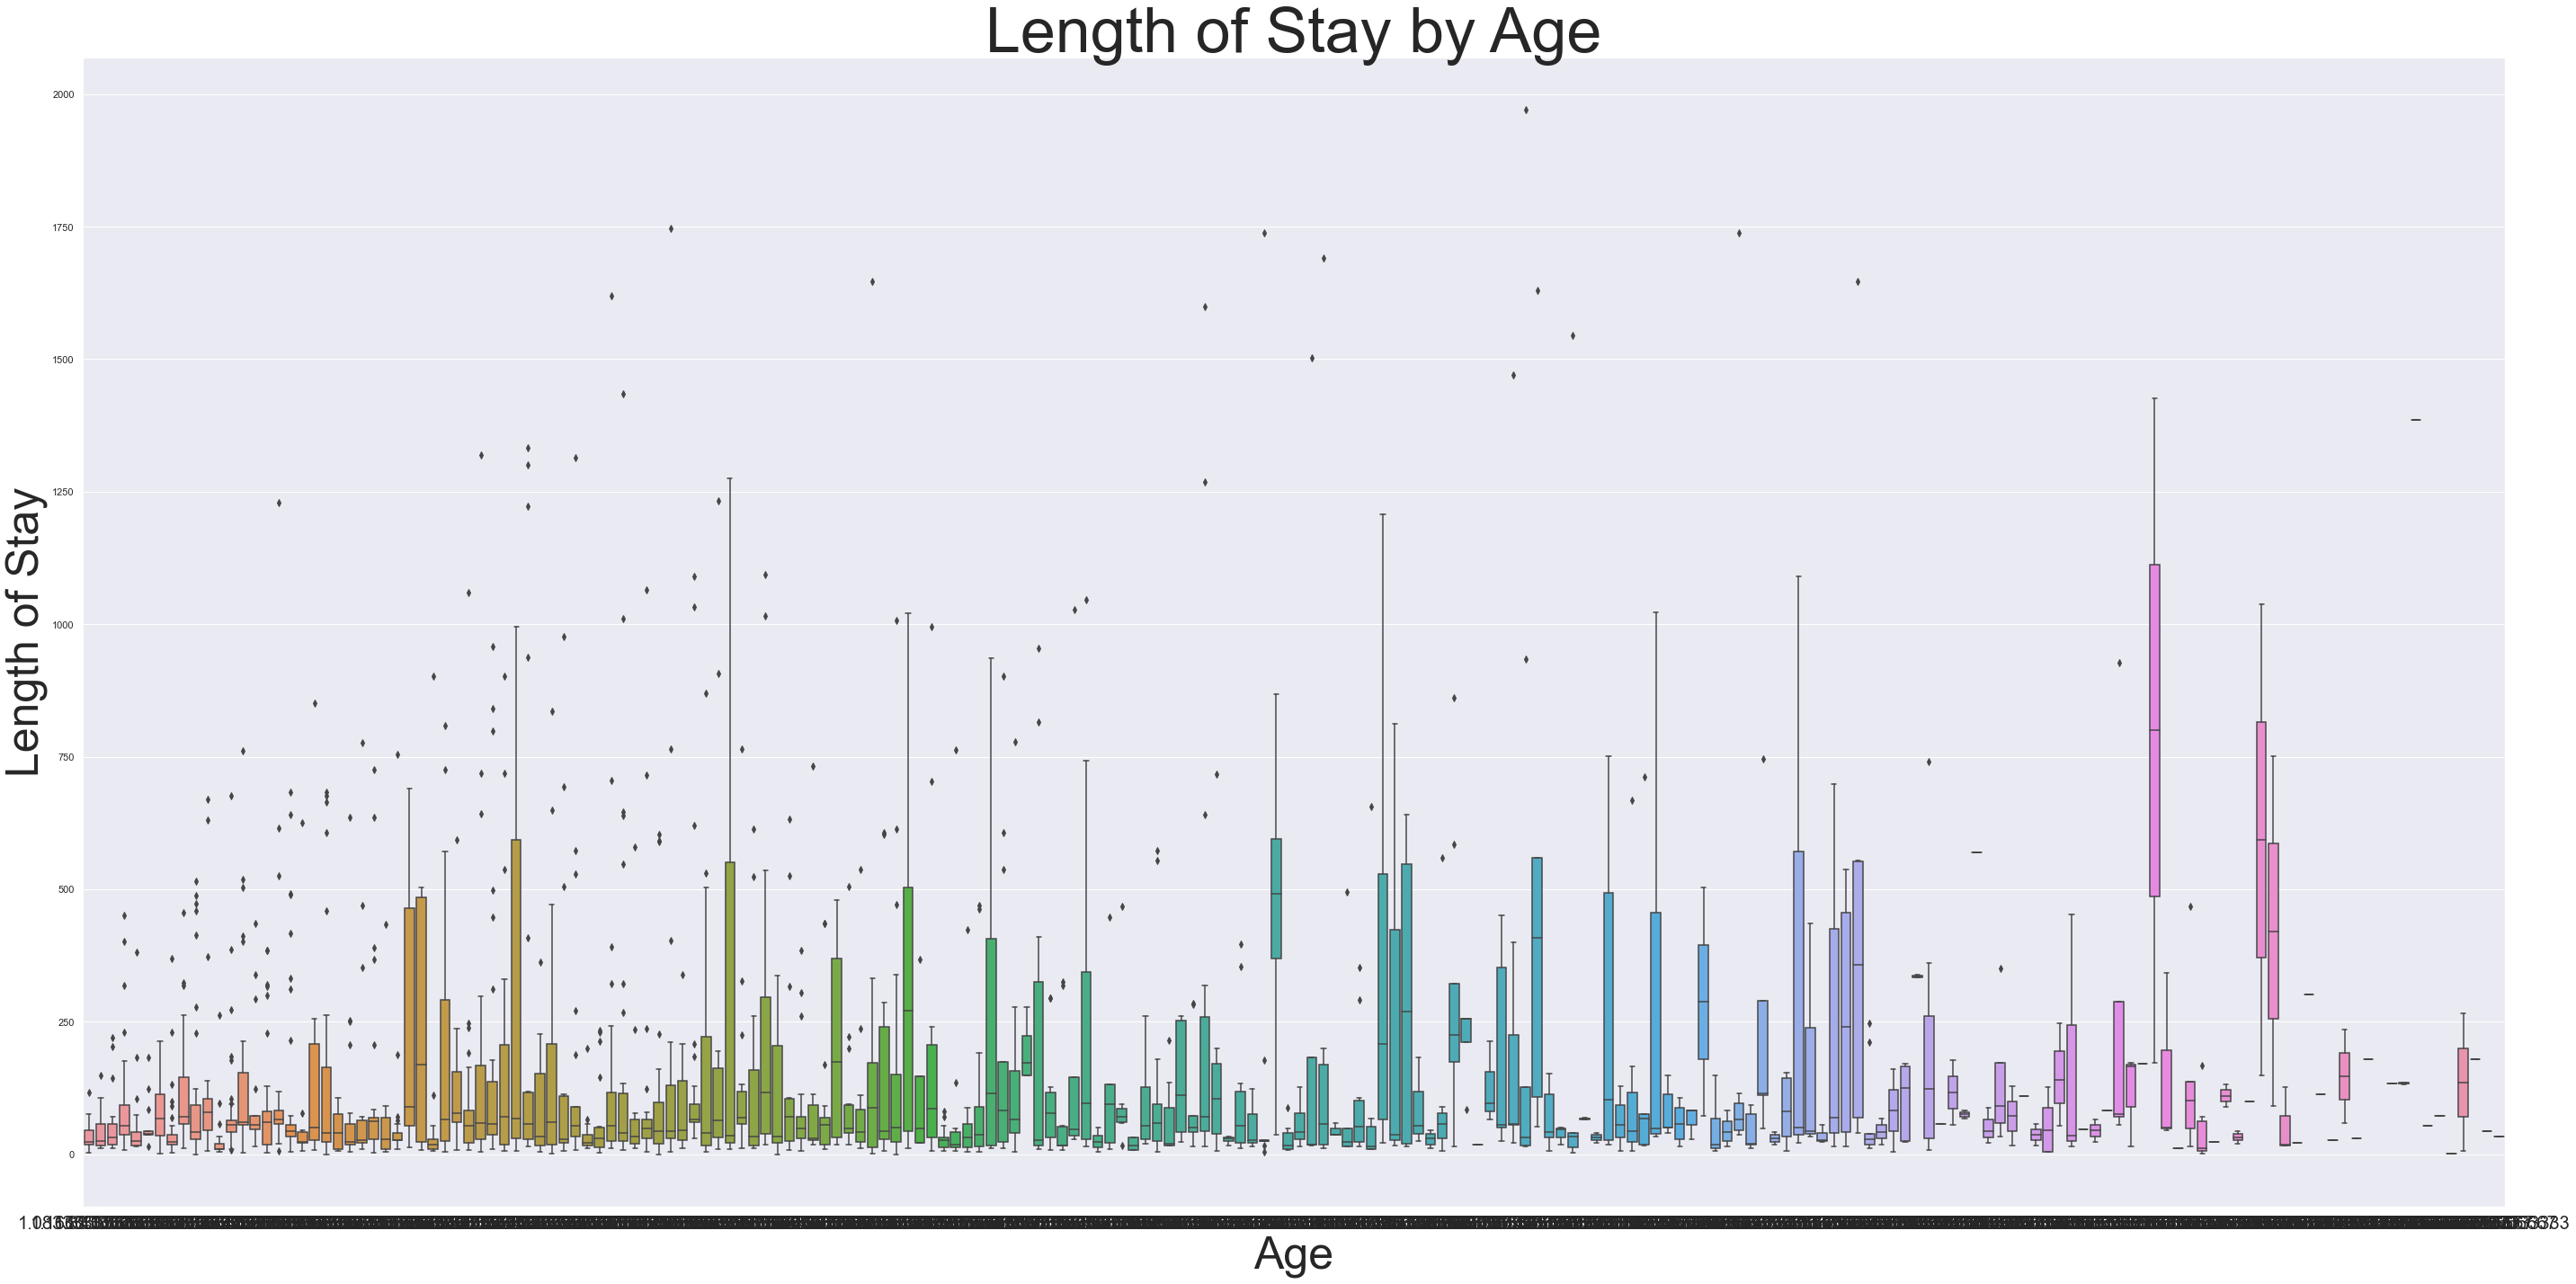

In [26]:
# Set the plot size
plt.figure(figsize = (40, 20))
# Assign the boxplots to 'ax'
ax = sns.boxplot(data = muddy_p_df, x = muddy_p_df['age_total_years'], y = 'length_of_stay_days')
# Set the x tick labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 20)
# Add a title of fontsize 70
ax.set_title('Length of Stay by Age', fontsize = 70)
# Add an x axis label of fontsize 50
plt.xlabel('Age', fontsize = 50)
# Add a y axis label of fontsize 50
plt.ylabel('Length of Stay', fontsize = 50)
# Apply tight layout to the plot
plt.tight_layout()
# Show the plot
plt.show()

This graph is really only helpful in getting a 50,000 foot view of how age impacts length of stay. It's not really useful for much else, since it's so crowded and age is technically a continous variable.

It seems that mostly age doesn't impact length of stay, but we need to keep in mind that older animals often pass away while in rescue. So those shorter stays don't necessarily indicate a higher adoption rate.

The next chart can be used to compare length of stay to both age and gender.

C:\Users\runek\AppData\Local\Temp/ipykernel_37960/4177487111.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 20)
C:\Users\runek\AppData\Local\Temp/ipykernel_37960/4177487111.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), size = 20)


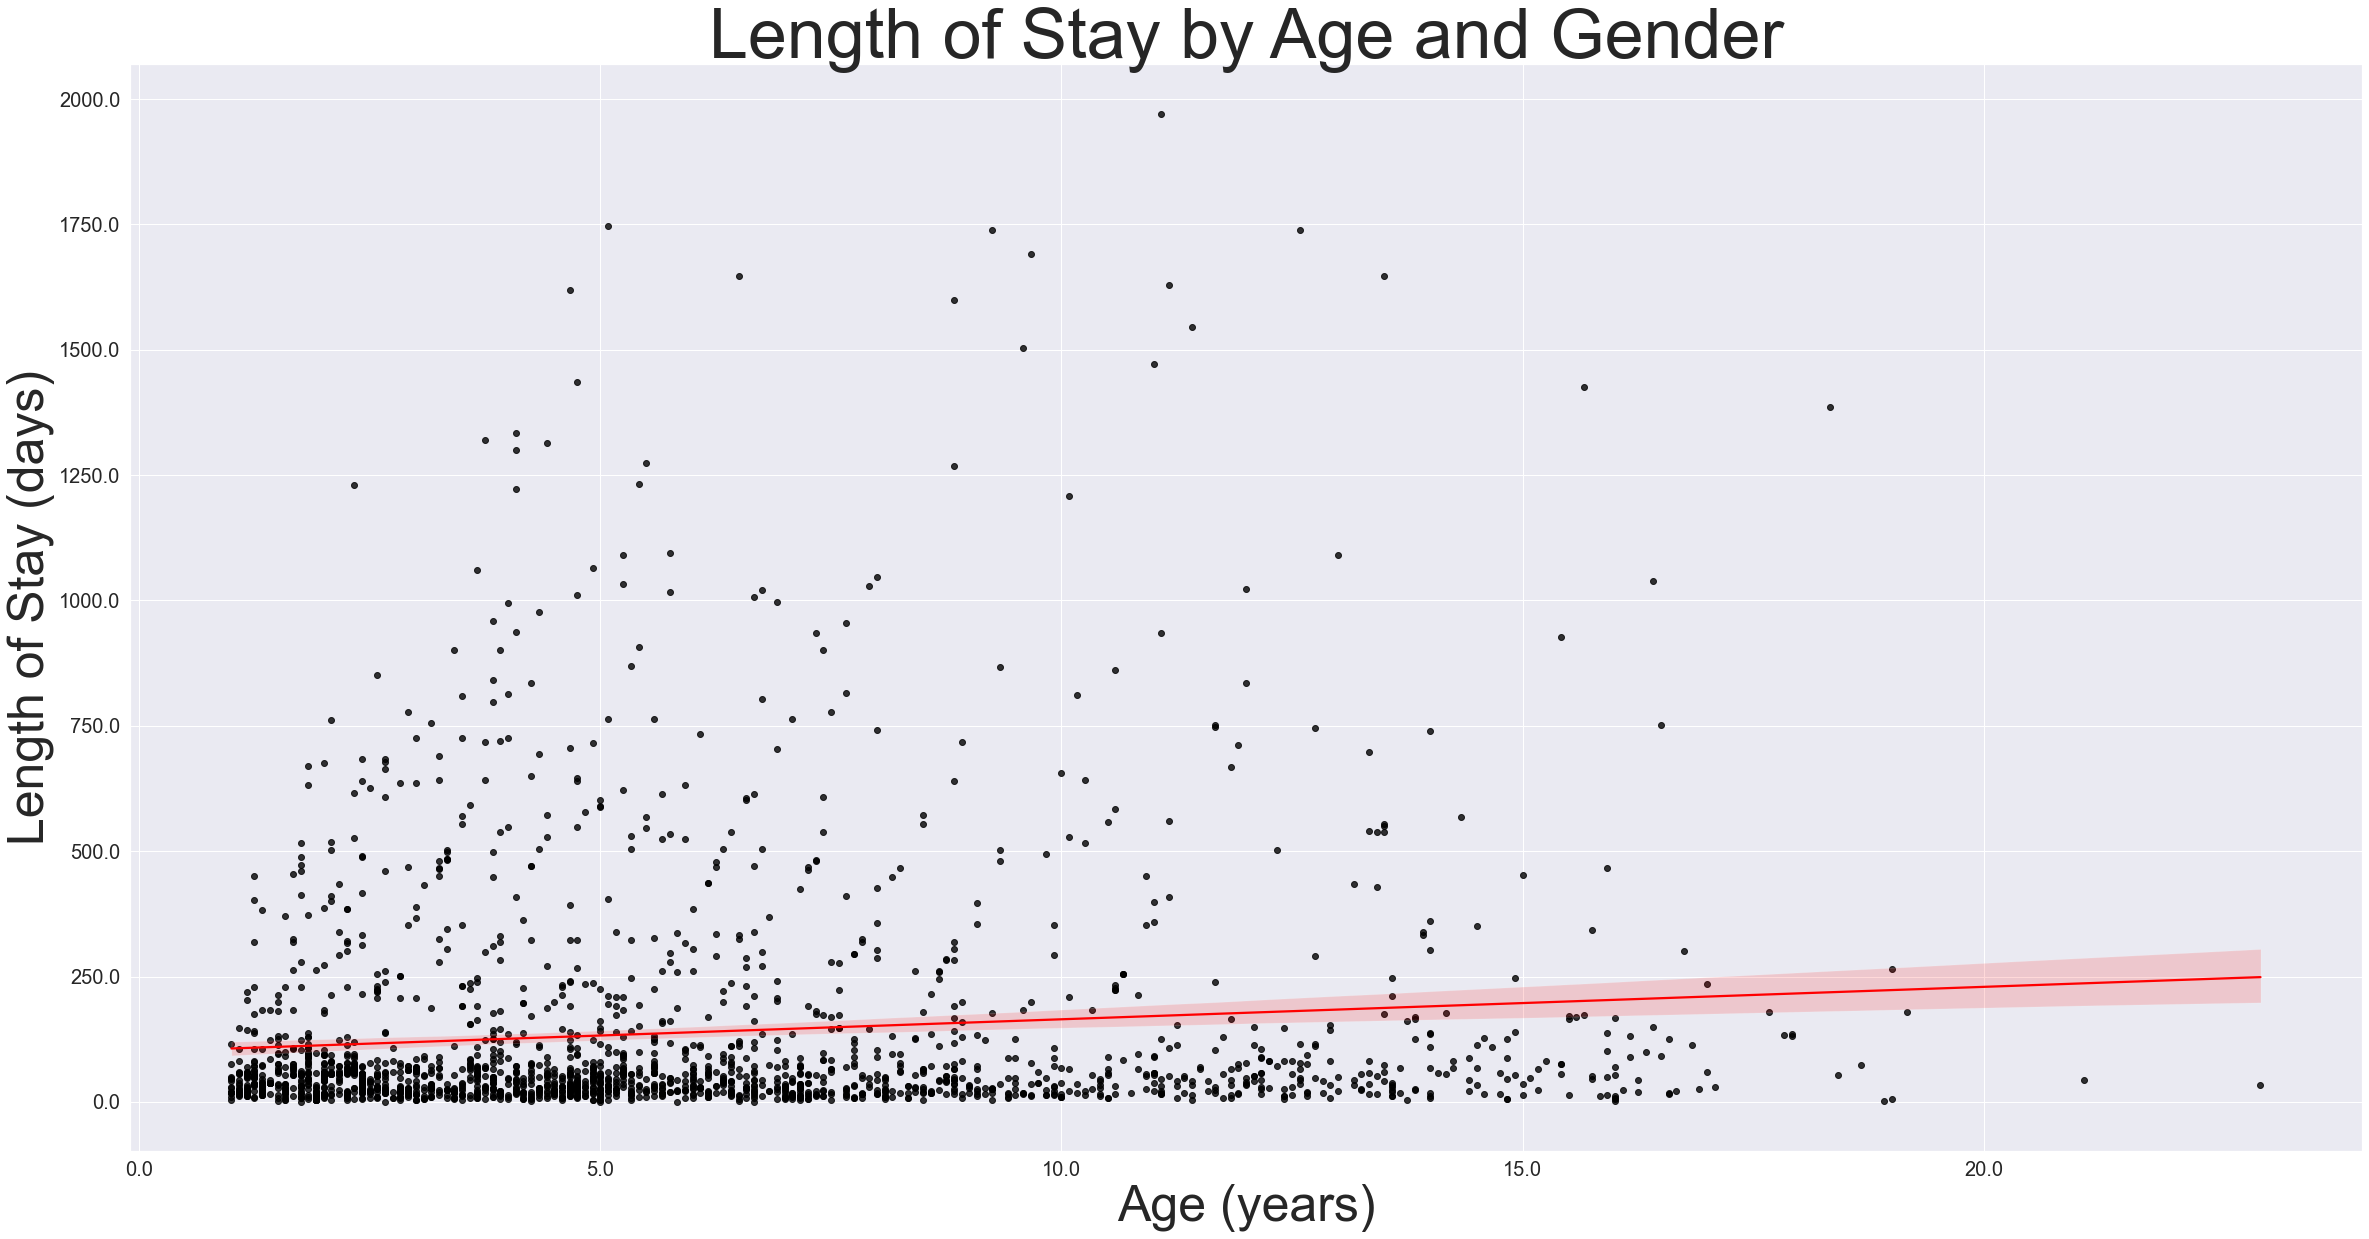

In [29]:
# Create a scatterplot with line of best fit using the muddy_p_df with dot colors of black and line color of red
ax = sns.regplot(x = 'age_total_years', y = 'length_of_stay_days', data = muddy_p_df, scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})

# Set fontsize of y ticks to 20
ax.set_yticklabels(ax.get_yticks(), size = 20)
# Set fontsize of x ticks to 20
ax.set_xticklabels(ax.get_xticks(), size = 20)

# Add a title and set to fontsize 70
plt.title('Length of Stay by Age and Gender', fontsize = 70)
# Add an x axis label at fontsize 50
plt.xlabel('Age (years)', fontsize = 50)
# Add a y axis label at fontsize 50
plt.ylabel('Length of Stay (days)', fontsize = 50)
# Set the size of the plot
plt.gcf().set_size_inches(40, 20)
# Show the plot
plt.show()

There is a very minorly positive correlation between age and length of stay.

Let's check by adoption fee.

C:\Users\runek\AppData\Local\Temp/ipykernel_37960/1914925782.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size = 20)
C:\Users\runek\AppData\Local\Temp/ipykernel_37960/1914925782.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), size = 20)


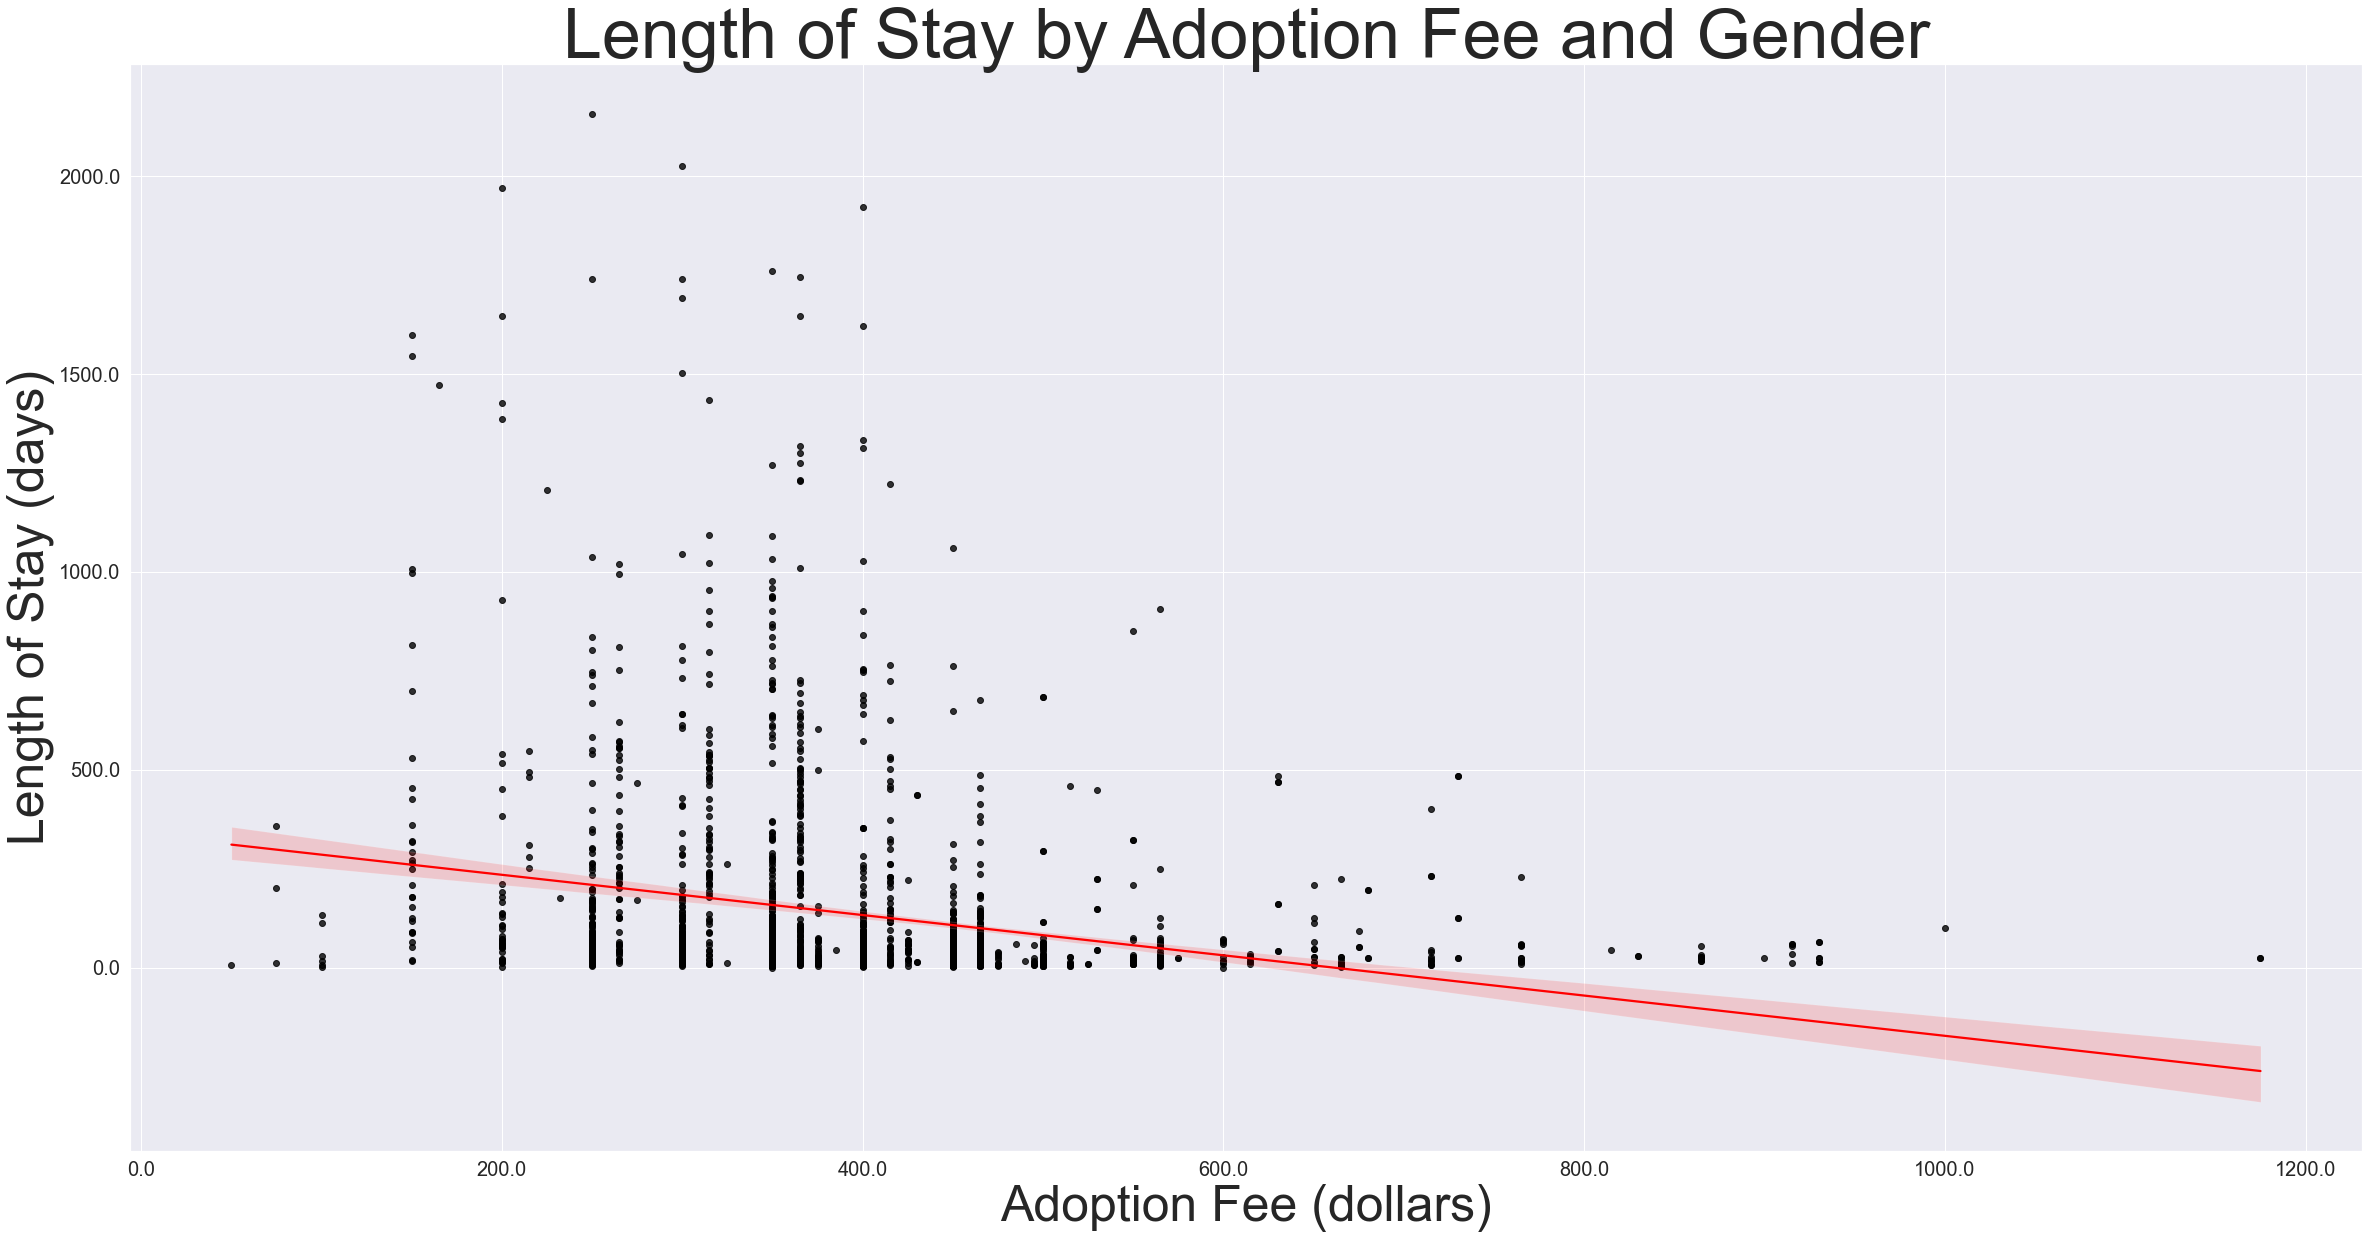

In [31]:
# Create a scatterplot with line of best fit using the muddy_p_df with dot colors of black and line color of red
ax = sns.regplot(x = 'adoption_fee', y = 'length_of_stay_days', data = muddy_p_df, scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})

# Set fontsize of y ticks to 20
ax.set_yticklabels(ax.get_yticks(), size = 20)
# Set fontsize of x ticks to 20
ax.set_xticklabels(ax.get_xticks(), size = 20)

# Add a title and set to fontsize 70
plt.title('Length of Stay by Adoption Fee and Gender', fontsize = 70)
# Add an x axis label at fontsize 50
plt.xlabel('Adoption Fee (dollars)', fontsize = 50)
# Add a y axis label at fontsize 50
plt.ylabel('Length of Stay (days)', fontsize = 50)
# Set the size of the plot
plt.gcf().set_size_inches(40, 20)
# Show the plot
plt.show()

This is an interesting result, and I realized after making this graph that adoption fee should actually be thought of as a categorical variable in this case. This is because the numbers are not continous. They are a series of set prices that are selected from when an animal joins Muddy Paws.

Notably, though, the line of best fit has a negative slope. This indicates that higher dog adoption fees lead to shorter lengths of stay. This is most likely because Muddy Paws assigns higher adoption fees to "fancy" dog breeds (think purebred standard poodle). Since adoption fees are used to pay for animal medical bills and other organizational expenses, it behooves Muddy Paws to set higher adoption prices for "fancy" dogs, because there is higher demand for them (leading to shorter lengths of stay) and their adoption fees can significantly impact medical outcomes for other animals.

In [32]:
# Display the percentages of dogs that fall within a certain breed
pd.set_option('display.float_format', '{:.2%}'.format)
muddy_p_df.pet_breed.value_counts(normalize = True)

labrador retriever               14.24%
american staffordshire terrier    7.88%
chihuahua                         7.55%
german shepherd dog               6.32%
boxer                             5.24%
                                  ...  
boston terrier                    0.41%
german shorthaired pointer        0.41%
poodle (toy or tea cup)           0.37%
bluetick coonhound                0.37%
collie                            0.37%
Name: pet_breed, Length: 62, dtype: float64

In [33]:
# Reset the display
pd.reset_option('display.float_format', '{:.2%}'.format)

C:\Users\runek\AppData\Local\Temp/ipykernel_37960/1117313760.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold')


Text(-73.125, 0.5, 'Primary Breed')

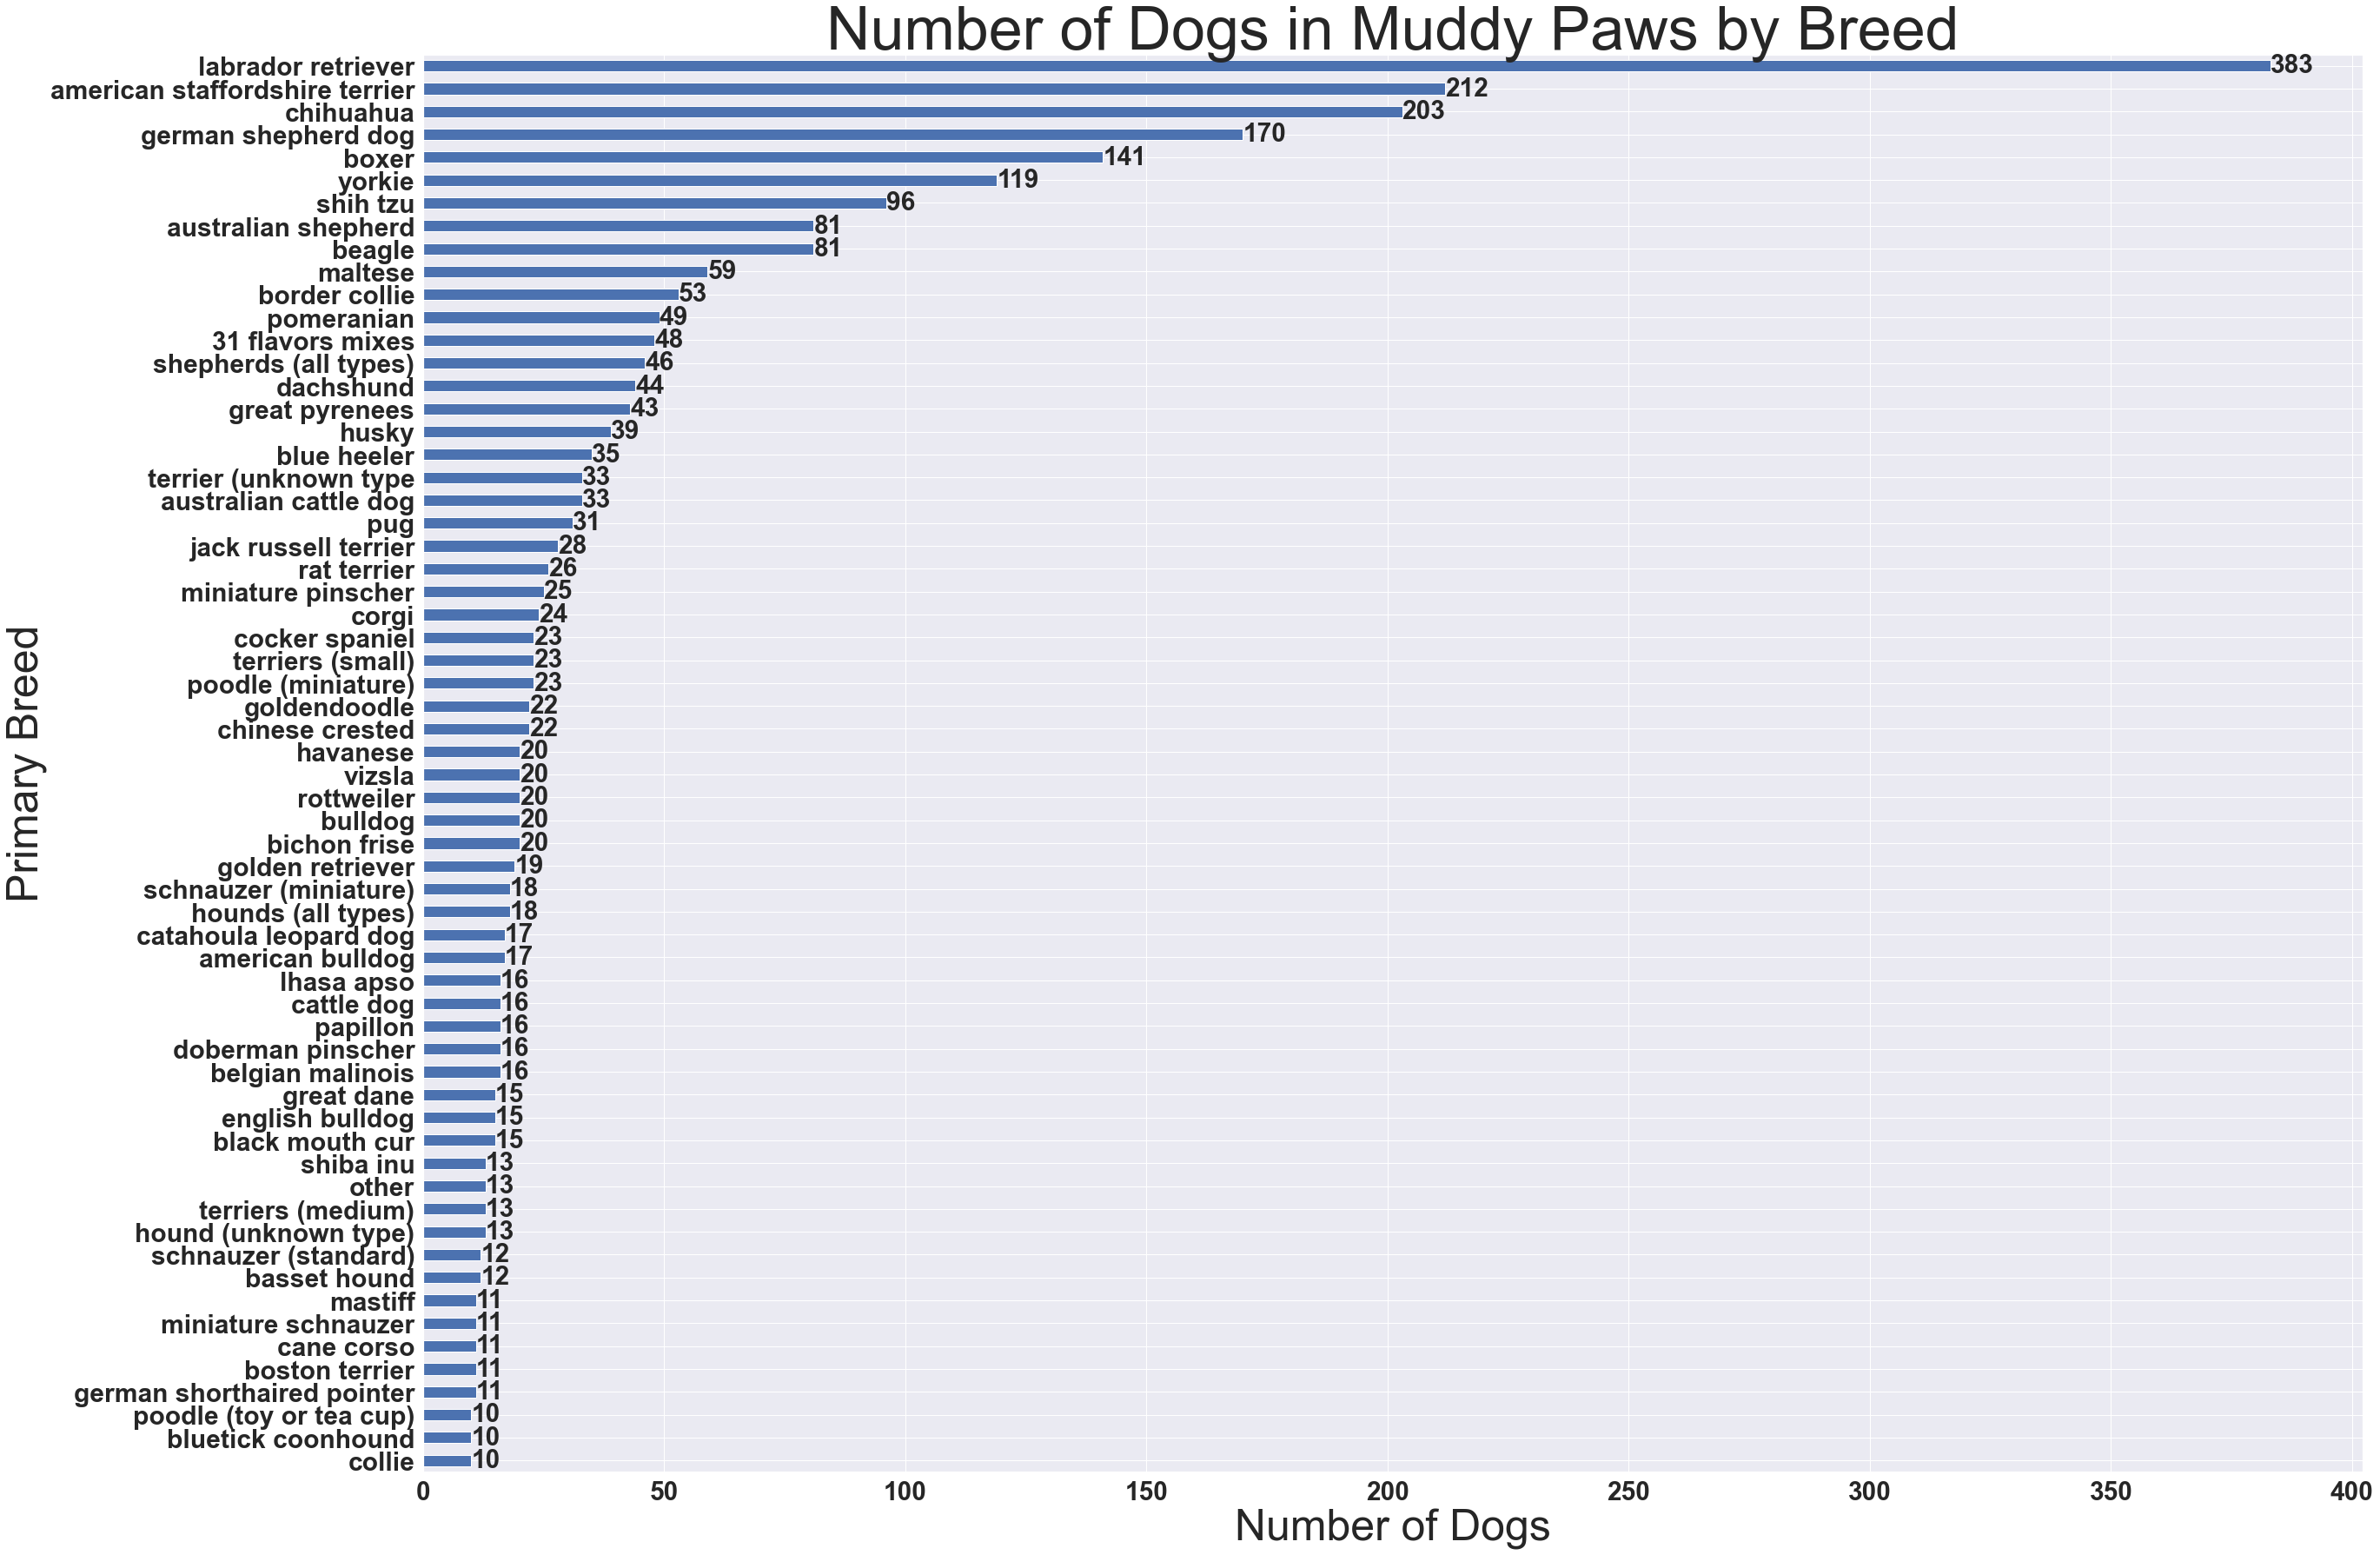

In [34]:
# Instantiate a variable called order that contains the alphabetized unique values from muddy_p_df pet_breed
order = sorted(muddy_p_df.pet_breed.unique())
# Set the figure size
sns.set(rc = {'figure.figsize':(40, 30)})
# Assign the bar plot for number of dog breeds to 'ax'
ax = muddy_p_df.pet_breed.value_counts().sort_values().plot(kind = 'barh')
# Set y tick labels to fontsize 30 and bold
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 30, fontweight = 'bold')
# Use plt.draw() to avoid an error with xtick labels
plt.draw()
# Set x tick labels to fontsize 30 and bold
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold')

# Label the ends of the bars with the number
ax.bar_label(ax.containers[0], fontsize = 30, fontweight = 'bold')

# Add a title at fontsize 70
ax.set_title('Number of Dogs in Muddy Paws by Breed', fontsize = 70)
# Add an x axis label at fontsize 50
plt.xlabel('Number of Dogs', fontsize = 50)
# Add a y axis label at fontsize 50
plt.ylabel('Primary Breed', fontsize = 50)

C:\Users\runek\AppData\Local\Temp/ipykernel_37960/1947052000.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold', color = 'white')


Text(-73.125, 0.5, 'Primary Breed')

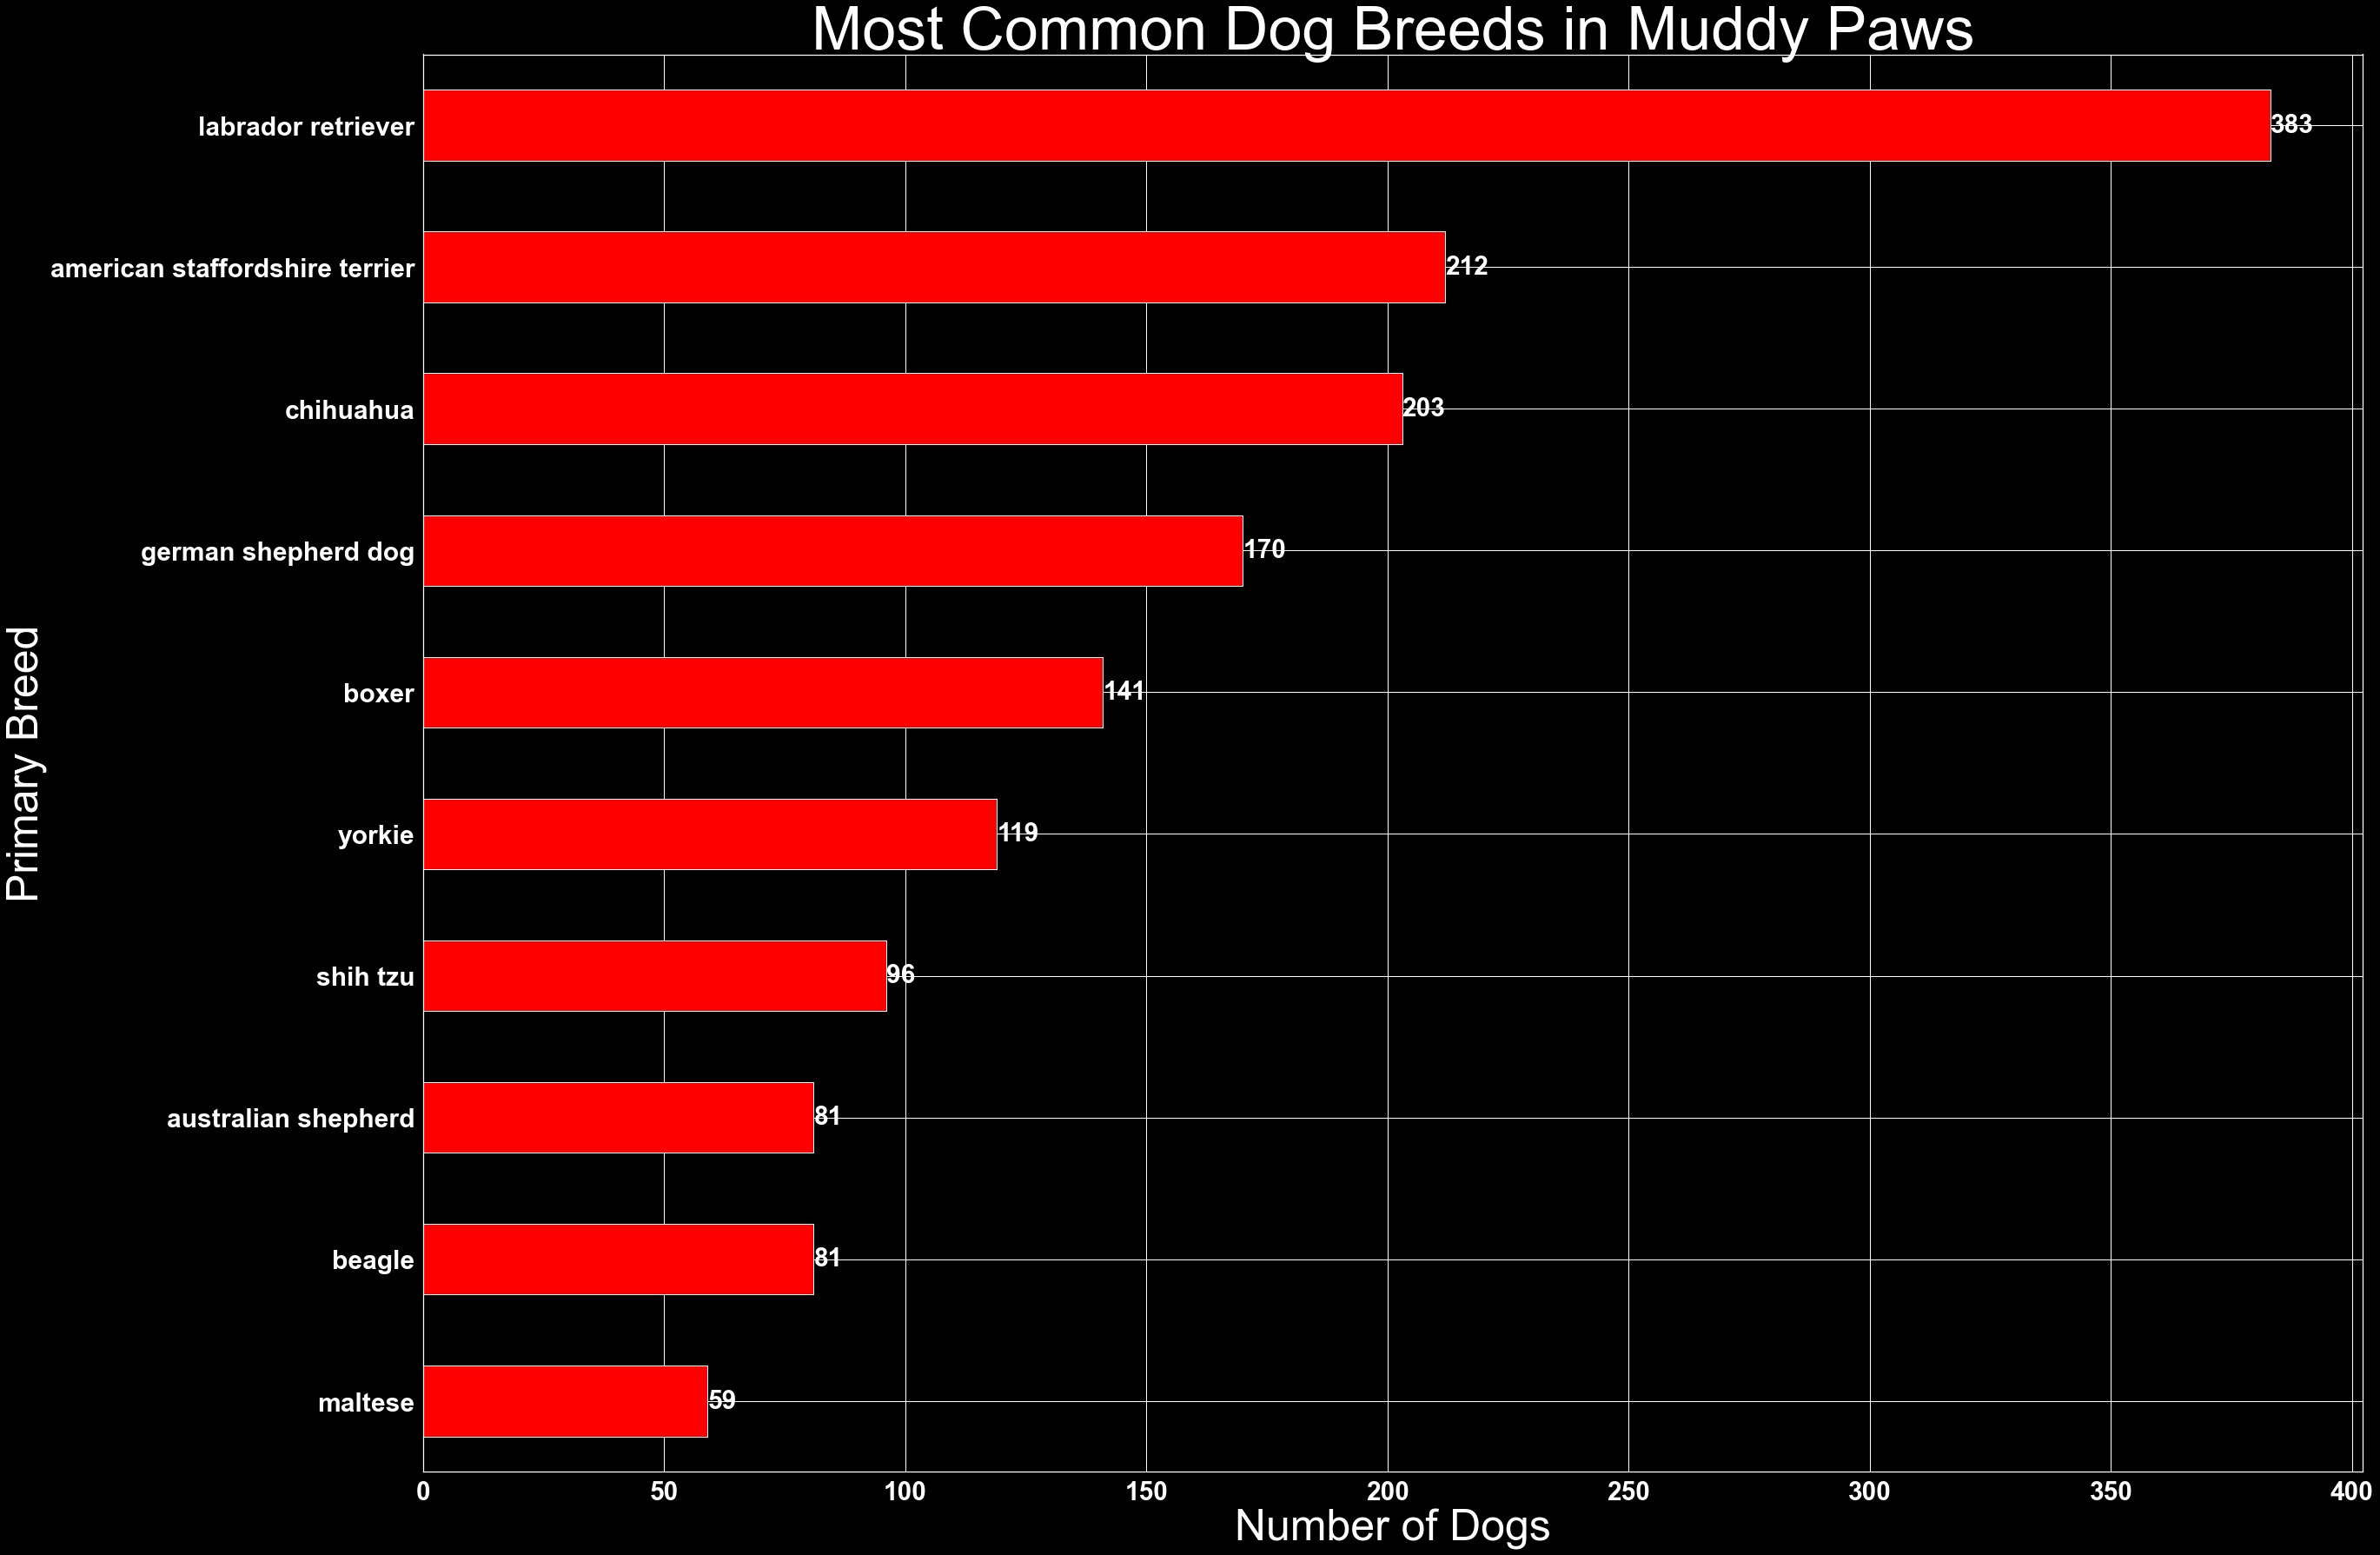

In [37]:
# Instantiate a variable called order that contains the alphabetized unique values from breedstay_10_df pet_breed
order = sorted(breedstay_10_df.pet_breed.unique())
# Set the figure size
sns.set(rc = {'figure.figsize':(40, 30)})
# Set the figure outside background color
plt.figure(facecolor = 'black')

# Assign the bar plot to 'ax' and set the fill color to red, the edge color to white
ax = breedstay_10_df.pet_breed.value_counts().sort_values().plot(kind = 'barh', color = 'red', edgecolor = 'white')
# Change the plot background color
ax.set_facecolor('black')

# Set y tick labels to font size 30, bold and color white
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 30, fontweight = 'bold', color = 'white')
# Use plt.draw() to avoid an error with xtick labels
plt.draw()
# Set y tick labels to font size 30, bold and color white
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold', color = 'white')

# Label the ends of the bars with the number of observations
ax.bar_label(ax.containers[0], fontsize = 30, fontweight = 'bold', color = 'white')

# Add a title at font size 70 and color white
ax.set_title('Most Common Dog Breeds in Muddy Paws', fontsize = 70, color = 'white')
# Add an x axis label at fontsize 50 and color white
plt.xlabel('Number of Dogs', fontsize = 50, color = 'white')
# Add a y axis label at fontsize 50 and color white
plt.ylabel('Primary Breed', fontsize = 50, color = 'white')

C:\Users\runek\AppData\Local\Temp/ipykernel_37960/845482153.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold', color = 'white')


<Figure size 2880x1440 with 0 Axes>

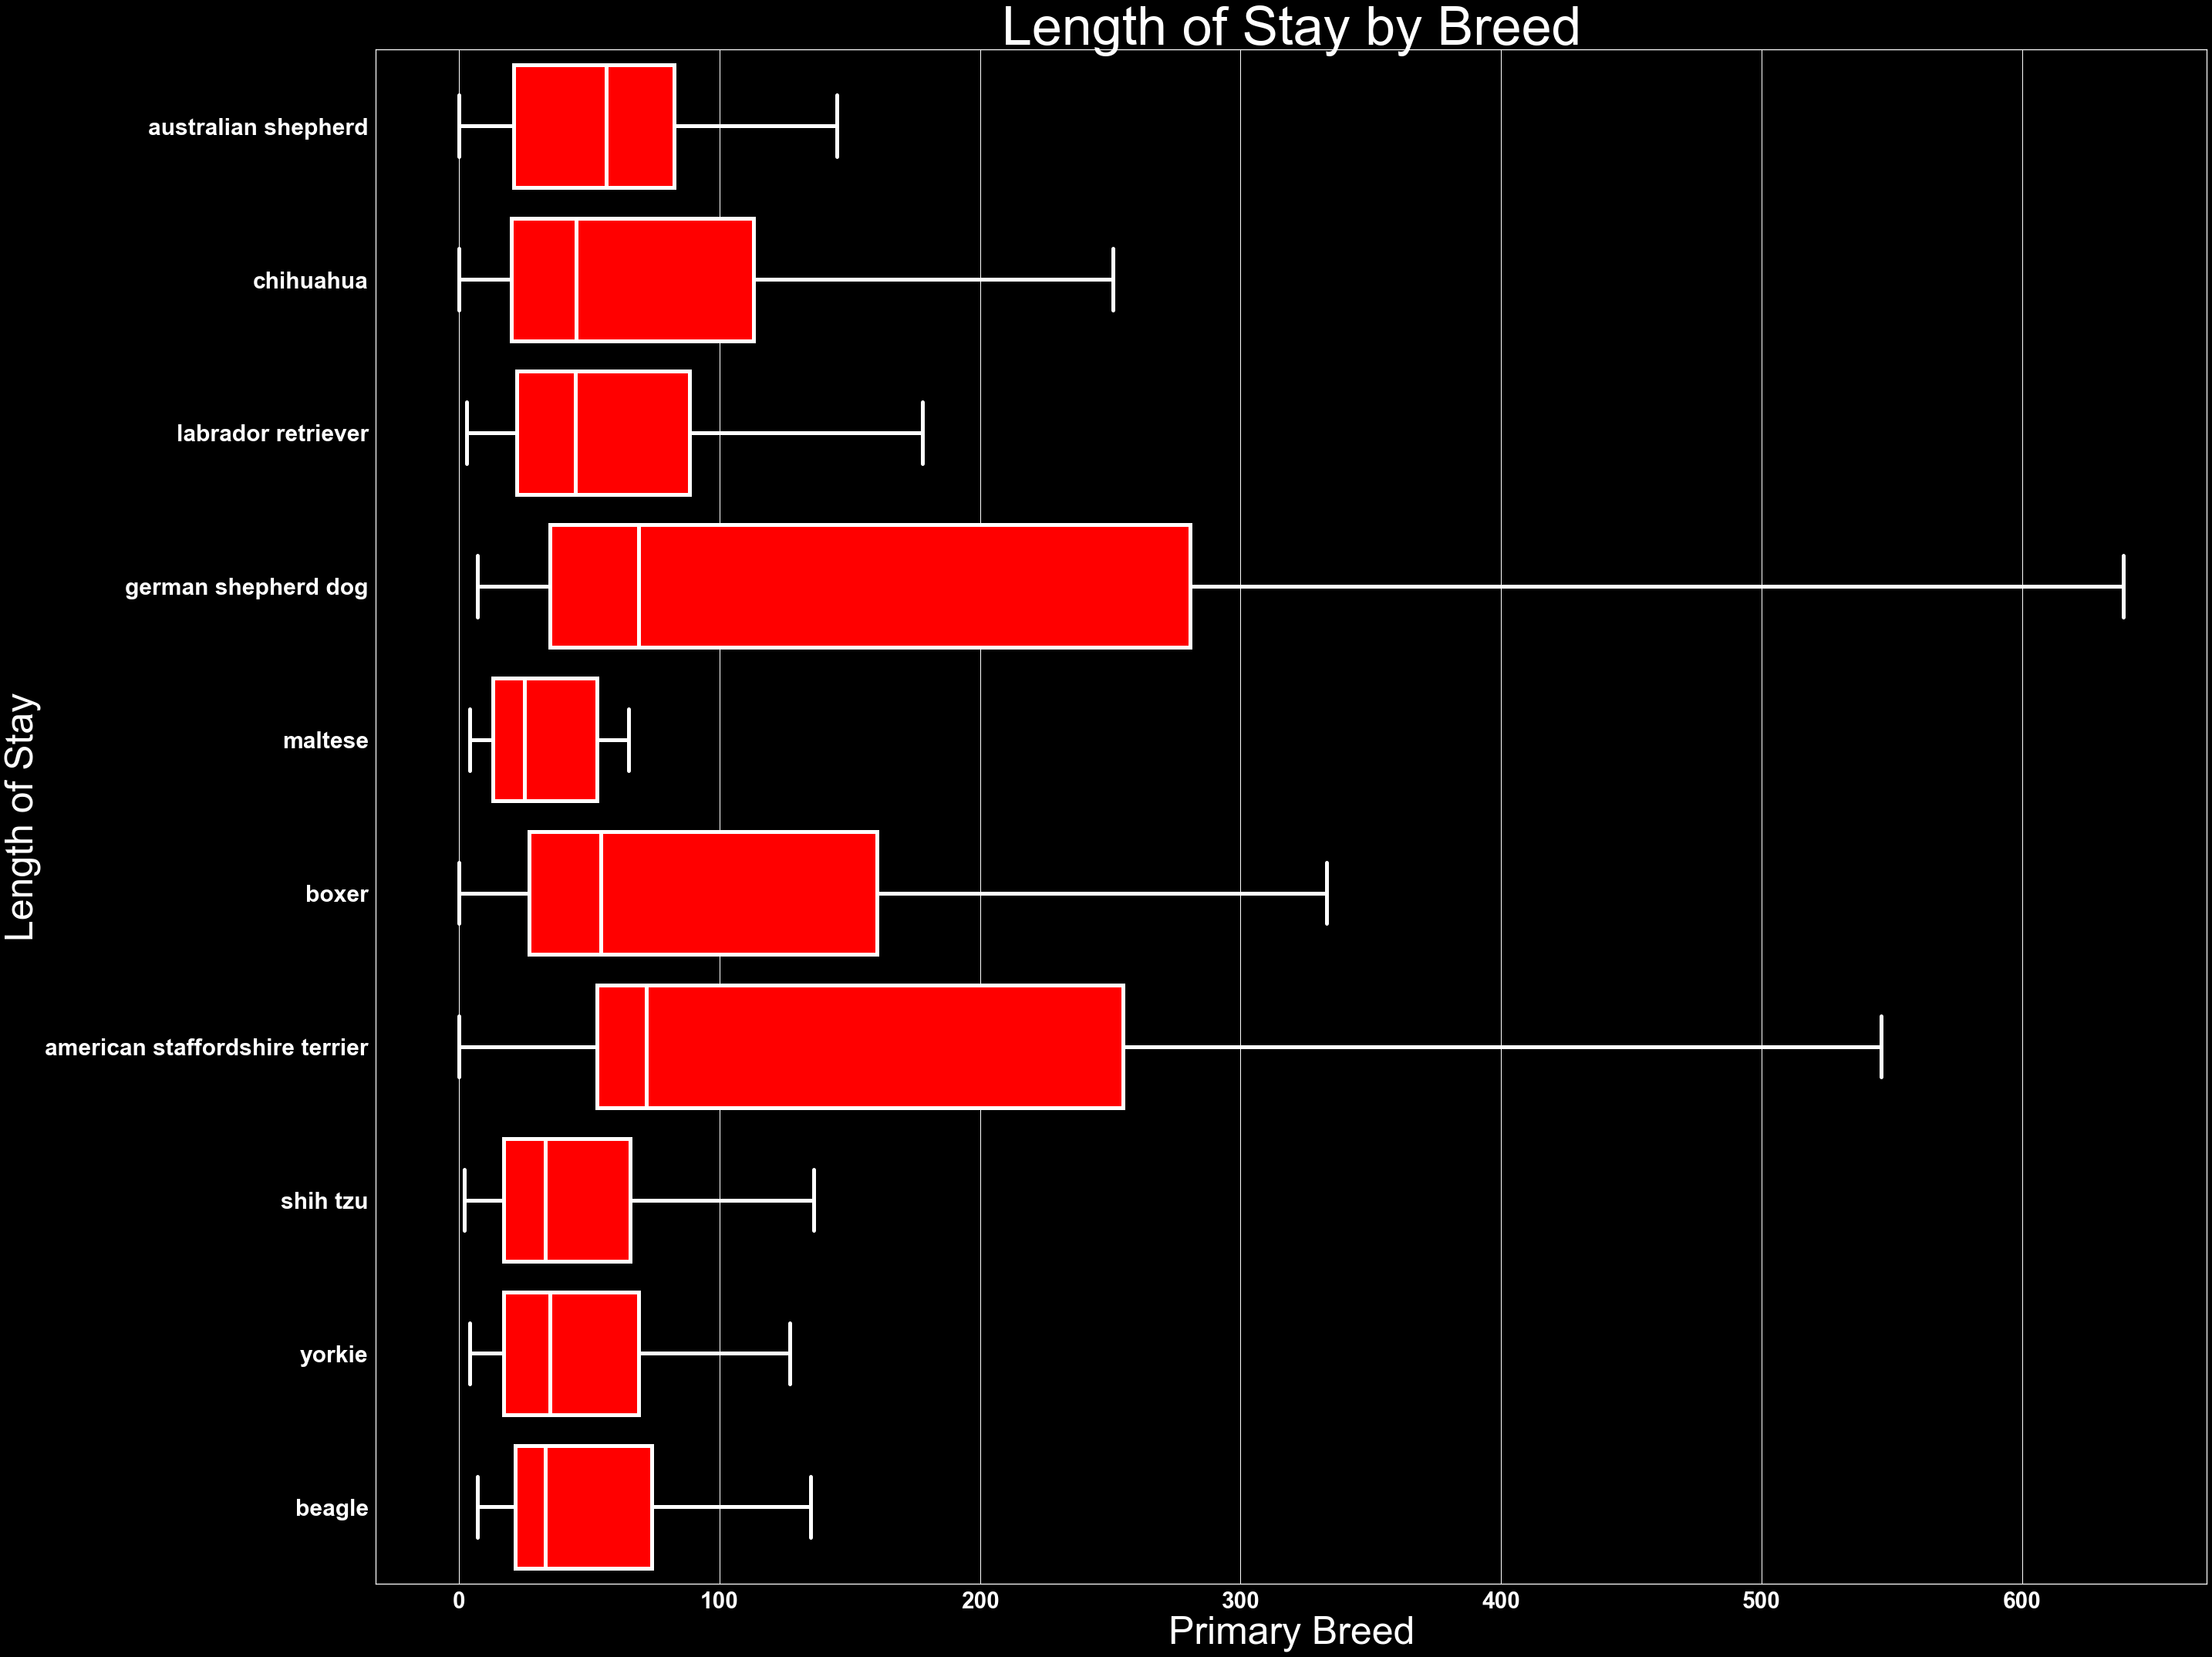

In [38]:
# Set the plot size
plt.figure(figsize = (40, 20))
# Set the outside background color to black
plt.figure(facecolor = 'black')

# Create a dictionary of boxplot features
PROPS = {
    'boxprops':{'facecolor':'red', 'edgecolor':'white'},
    'medianprops':{'color':'white'},
    'whiskerprops':{'color':'white'},
    'capprops':{'color':'white'}
}

# Assign a boxplot to 'ax' with fill color of read also utilizing the PROPS dictionary from above
ax = sns.boxplot(data = breedstay_10_df, x = 'length_of_stay_days', y = 'pet_breed', orient = 'h', 
                 linewidth = 5, color = 'red', showfliers = False, **PROPS)
# Set plot background to black
ax.set_facecolor('black')

# Set y tick labels to font size 30, bold, color white
ax.set_yticklabels(ax.get_yticklabels(), fontsize = 30, fontweight = 'bold', color = 'white')
# Use plt.draw() to avoid an error with xtick labels
plt.draw()
# Set x tick labels to font size 30, bold, color white
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 30, fontweight = 'bold', color = 'white')

ax.set_title('Length of Stay by Breed', fontsize = 70, color = 'white')
plt.xlabel('Primary Breed', fontsize = 50, color = 'white')
plt.ylabel('Length of Stay', fontsize = 50, color = 'white')
plt.tight_layout()
plt.show()